In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

In [2]:
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)

In [15]:
custom_palette = ['#33A4FF', '#FFB733', '#9FF767']
sns.set_palette(custom_palette)

In [99]:
df = pd.read_csv("smoking_driking_dataset_Ver01.csv")

In [67]:
import numpy as np
df['diabete'] = np.where(df['BLDS'] >= 126, 2,
                         np.where((df['BLDS'] < 126) & (df['BLDS'] >= 100), 1, 0))
df = df.drop("BLDS", axis = 1)
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,0
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,1
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,198.0,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N,0
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N,0
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,205.0,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y,0
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,122.0,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N,0


In [68]:
df['height'] = df['height'] / 100
df['bmi'] = df['weight'] / (df['height'] ** 2)
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
0,Male,35,1.70,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,0,25.951557
1,Male,30,1.80,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,1,24.691358
2,Male,40,1.65,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,0,27.548209
3,Male,50,1.75,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,0,26.122449
4,Male,50,1.65,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,1,22.038567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,1.75,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,198.0,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N,0,26.122449
991342,Male,35,1.70,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N,0,25.951557
991343,Female,40,1.55,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,205.0,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y,0,20.811655
991344,Male,25,1.75,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,122.0,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N,0,19.591837


In [69]:
df = df.drop(['height', 'weight'], axis = 1)

In [70]:
df['sex'] = np.where(df['sex'] == "Male", 1, 0) # 남자 1, 여자 0
df['DRK_YN'] = np.where(df['DRK_YN'] == "Y", 1, 0) # 1이 음주 ㅇㅇ, 0이 음주 ㄴㄴ
df['hear_left'] = np.where(df['hear_left'] == 2, 1, 0)
df['hear_right'] = np.where(df['hear_right'] == 2, 1, 0)
df

,sex,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
0,1,35,90.0,1.0,1.0,0,0,120.0,80.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1,0,25.951557
1,1,30,89.0,0.9,1.2,0,0,130.0,82.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0,1,24.691358
2,1,40,91.0,1.2,1.5,0,0,120.0,70.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0,0,27.548209
3,1,50,91.0,1.5,1.2,0,0,145.0,87.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0,0,26.122449
4,1,50,80.0,1.0,1.2,0,0,138.0,82.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0,1,22.038567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,92.1,1.5,1.5,0,0,114.0,80.0,198.0,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0,0,26.122449
991342,1,35,86.0,1.0,1.5,0,0,119.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0,0,25.951557
991343,0,40,68.0,1.0,0.7,0,0,110.0,70.0,205.0,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1,0,20.811655
991344,1,25,72.0,1.5,1.0,0,0,119.0,74.0,122.0,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0,0,19.591837


In [100]:
df[df.waistline>300]

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
11230,Female,30,160,55,999.0,1.0,1.0,1.0,1.0,100.0,...,91.0,180.0,12.6,1.0,0.8,12.0,8.0,11.0,1.0,N
23779,Female,25,160,60,999.0,0.9,0.9,1.0,1.0,118.0,...,160.0,234.0,14.1,3.0,1.1,22.0,10.0,14.0,1.0,N
30711,Female,25,160,55,999.0,0.8,1.0,1.0,1.0,102.0,...,99.0,80.0,11.1,1.0,0.6,14.0,12.0,10.0,1.0,N
59546,Female,25,160,65,999.0,1.5,1.5,1.0,1.0,106.0,...,90.0,306.0,11.2,1.0,0.6,14.0,14.0,10.0,1.0,N
67877,Female,30,155,60,999.0,1.0,1.5,1.0,1.0,114.0,...,146.0,280.0,10.4,1.0,0.8,15.0,6.0,10.0,1.0,N
91861,Female,30,160,50,999.0,1.2,1.5,1.0,1.0,101.0,...,123.0,165.0,10.2,1.0,0.6,36.0,45.0,7.0,1.0,N
114583,Female,25,165,70,999.0,0.2,0.2,1.0,1.0,119.0,...,135.0,190.0,11.9,1.0,0.4,22.0,11.0,8.0,1.0,N
120470,Female,20,155,55,999.0,1.5,1.5,1.0,1.0,100.0,...,108.0,75.0,12.1,1.0,0.8,15.0,12.0,8.0,1.0,N
125594,Female,30,155,60,999.0,0.9,0.7,1.0,1.0,107.0,...,91.0,86.0,11.2,1.0,0.4,27.0,25.0,13.0,1.0,N
132547,Female,35,160,55,999.0,0.9,0.9,1.0,1.0,110.0,...,148.0,331.0,12.7,1.0,0.6,19.0,13.0,11.0,1.0,N


In [71]:
df_2030 = df[(df['age']==25) | (df['age']==20) | (df['age']==35) | (df['age']==30)]
df_2030

,sex,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
0,1,35,90.0,1.0,1.0,0,0,120.0,80.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1,0,25.951557
1,1,30,89.0,0.9,1.2,0,0,130.0,82.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0,1,24.691358
7,1,35,84.2,1.2,1.0,0,0,132.0,80.0,185.0,58.0,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,1,0,21.224490
13,1,30,88.0,1.2,1.2,0,0,118.0,72.0,200.0,55.0,129.0,77.0,15.7,1.0,0.9,13.0,16.0,19.0,1.0,1,0,24.489796
14,0,30,76.0,0.9,1.0,0,0,129.0,77.0,205.0,53.0,108.0,219.0,14.5,1.0,0.6,21.0,24.0,58.0,1.0,0,0,19.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991333,0,35,70.0,0.7,0.9,0,0,110.0,80.0,209.0,57.0,140.0,59.0,12.9,1.0,1.0,25.0,12.0,13.0,1.0,1,0,27.055151
991337,0,35,81.0,1.0,1.0,0,0,113.0,69.0,173.0,63.0,92.0,88.0,13.3,1.0,0.7,20.0,17.0,12.0,1.0,0,0,25.711662
991338,1,20,74.5,1.0,1.5,0,0,105.0,70.0,211.0,72.0,120.0,92.0,15.4,1.0,0.8,25.0,26.0,50.0,2.0,1,0,21.224490
991342,1,35,86.0,1.0,1.5,0,0,119.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0,0,25.951557


In [72]:
# age라는 변인의 카테고리수를 줄이기 위해서, 연령대로 변환
df_2030['age'] = np.where(df_2030['age'] == 20, 0,
                           np.where(df_2030['age'] == 25, 1,
                                    np.where(df_2030['age'] == 30, 2, 3)))

C:\Users\hwwe1\AppData\Local\Temp\ipykernel_41688\1107320600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2030['age'] = np.where(df_2030['age'] == 20, 0,


In [9]:
# 범주형 변인들의 분포 확인: sex, DRK_YN, SMK_stat_type_cd
print(df_2030.SMK_stat_type_cd.value_counts())
print()
print(df_2030.DRK_YN.value_counts())
print()
print(df_2030.sex.value_counts())
print(df_2030.hear_left.value_counts())
print()
print(df_2030.hear_right.value_counts())
print()
print(df_2030.hear_left.value_counts())
print()
print(df_2030.hear_right.value_counts())
print()
print(df_2030.age.value_counts())
print()
print(df_2030.urine_protein.value_counts())
print()
print(df_2030.diabete.value_counts())

1.0    145986
3.0     71951
2.0     30730
Name: SMK_stat_type_cd, dtype: int64

1    164924
0     83743
Name: DRK_YN, dtype: int64

1    151219
0     97448
Name: sex, dtype: int64
0    247852
1       815
Name: hear_left, dtype: int64

0    247826
1       841
Name: hear_right, dtype: int64

0    247852
1       815
Name: hear_left, dtype: int64

0    247826
1       841
Name: hear_right, dtype: int64

3    84726
2    77600
1    64370
0    21971
Name: age, dtype: int64

1.0    235999
2.0      8134
3.0      3317
4.0       910
5.0       253
6.0        54
Name: urine_protein, dtype: int64

0    194394
1     49606
2      4667
Name: diabete, dtype: int64


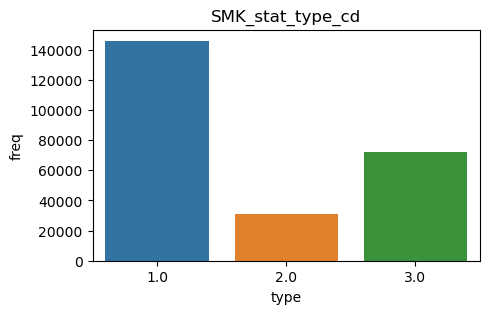

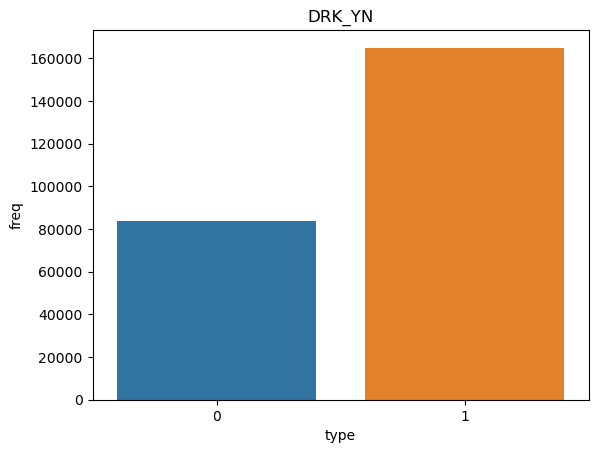

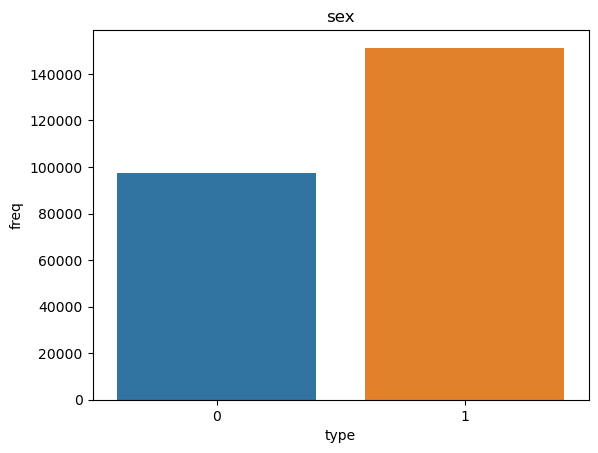

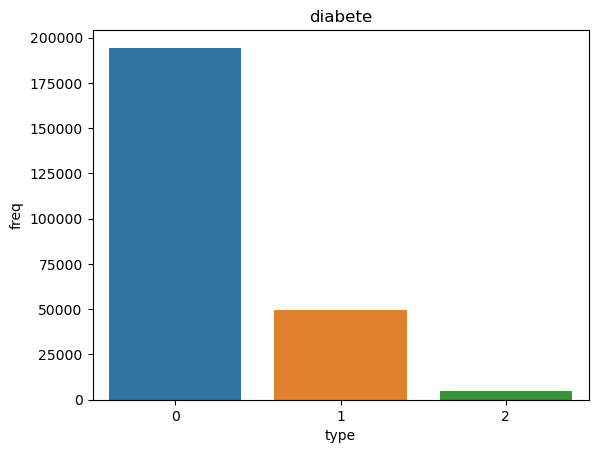

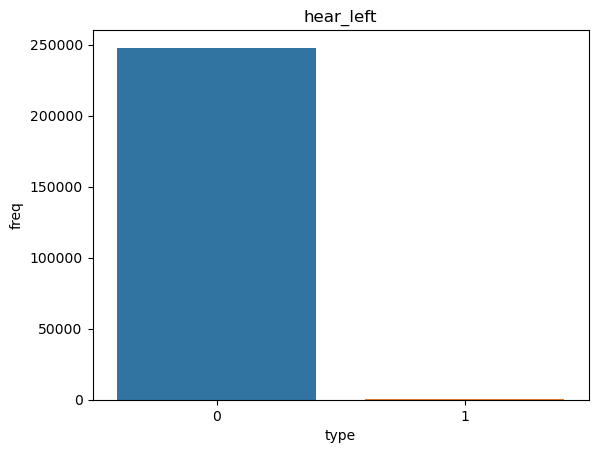

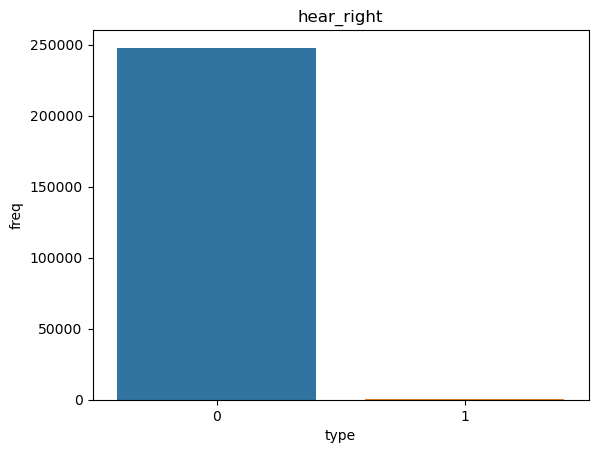

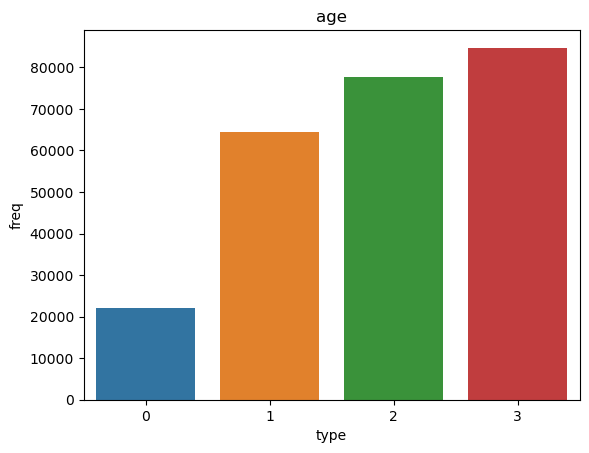

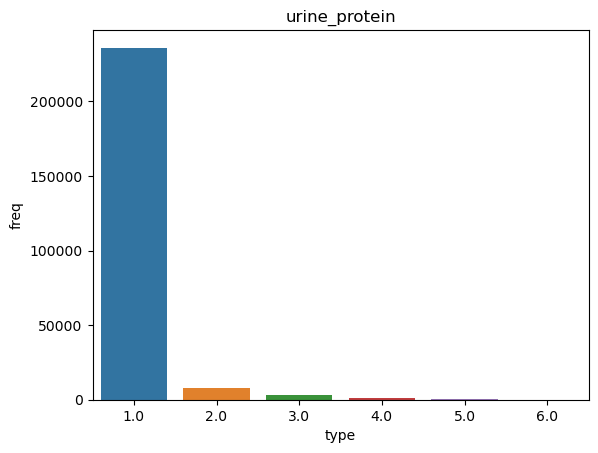

In [10]:
cate_list = ["SMK_stat_type_cd", "DRK_YN", "sex", 
             "diabete", "hear_left", "hear_right", 
             "age", "urine_protein"]

fig, ax = plt.subplots(1, figsize=(5, 3))

for i in range(len(cate_list)):
    freq = df_2030[cate_list[i]].value_counts().reset_index()
    freq.columns = ['type','freq']
    sns.barplot(x = "type", y = "freq", data = freq)
    plt.title(cate_list[i])
    plt.show()

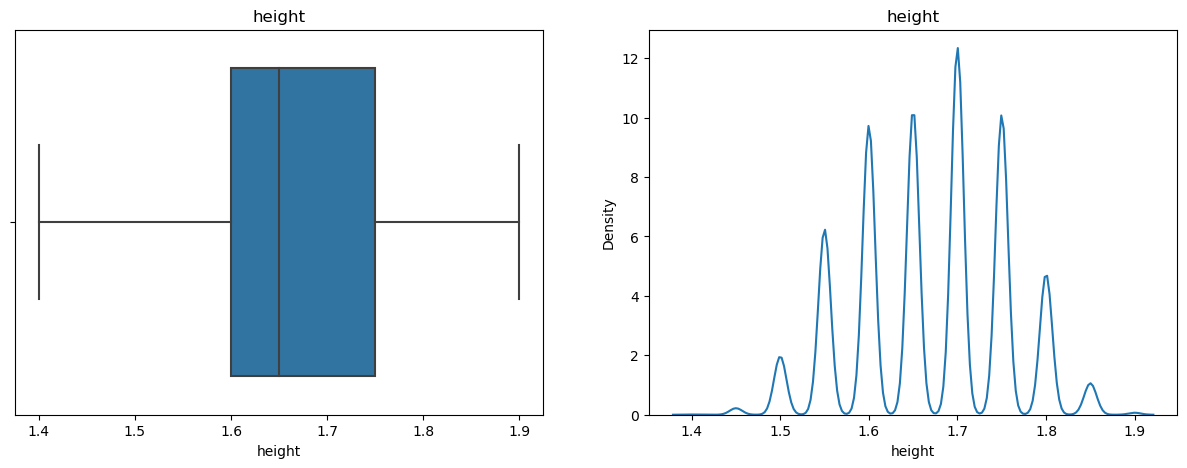

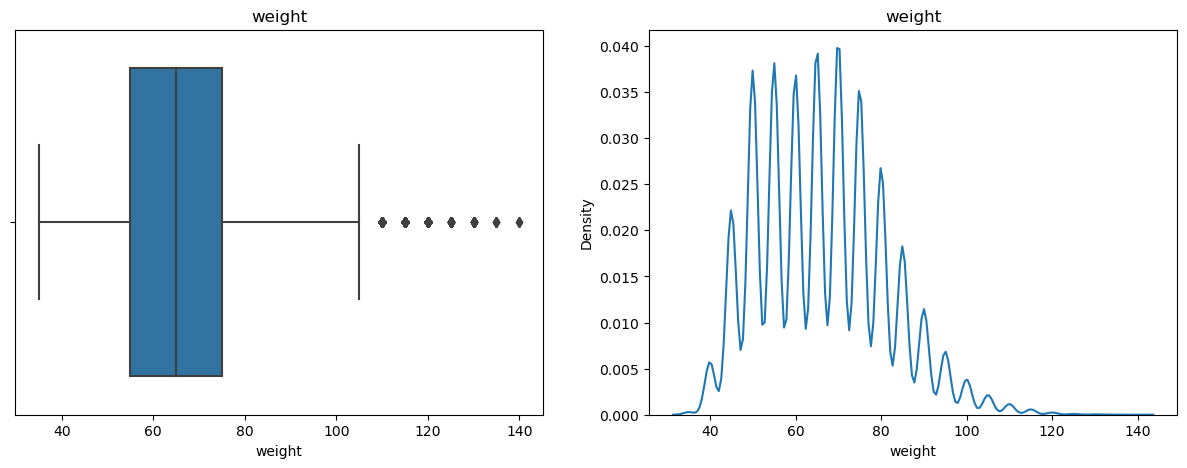

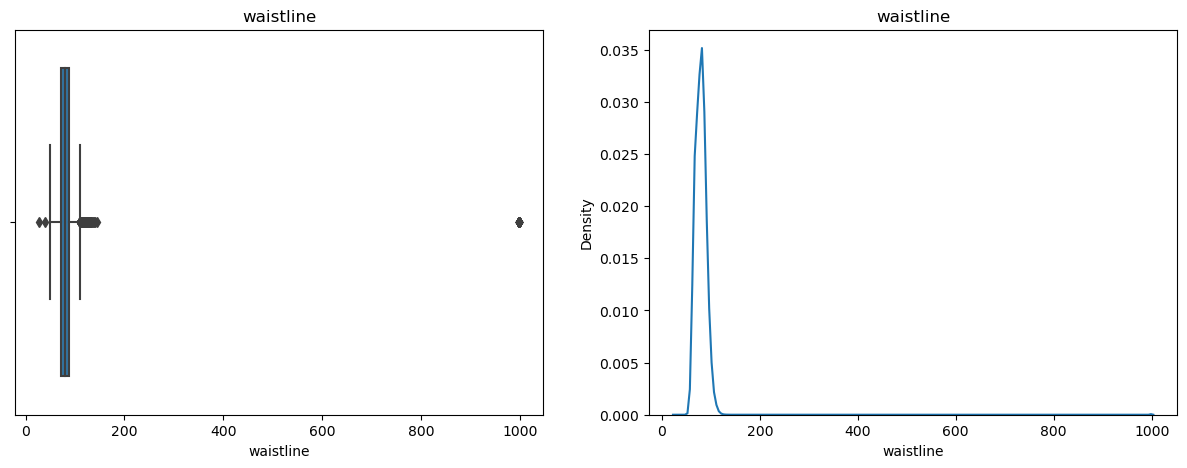

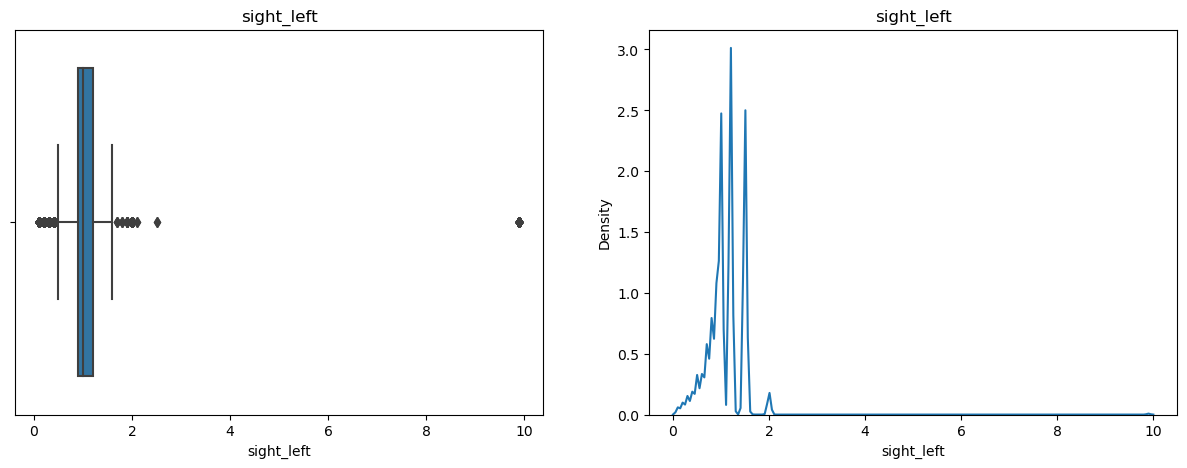

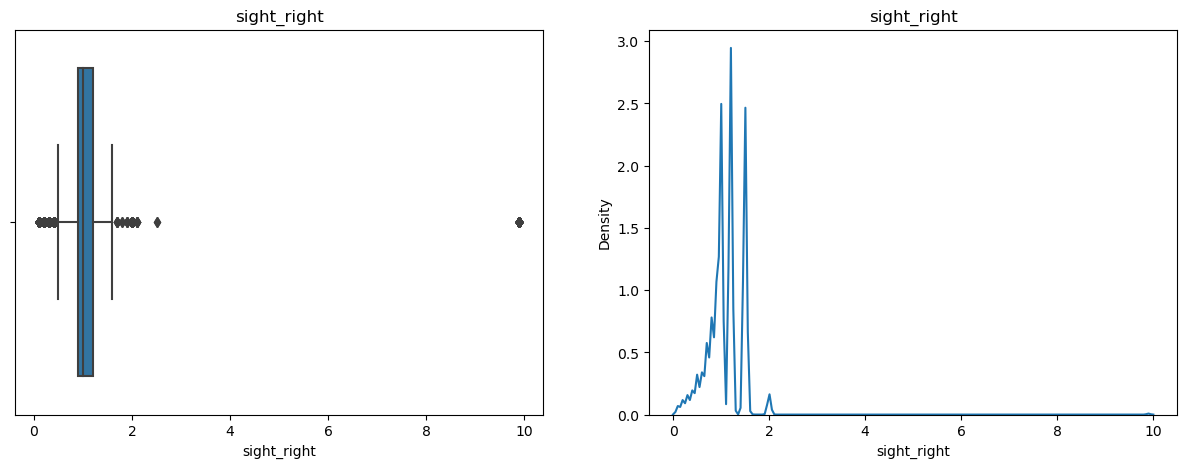

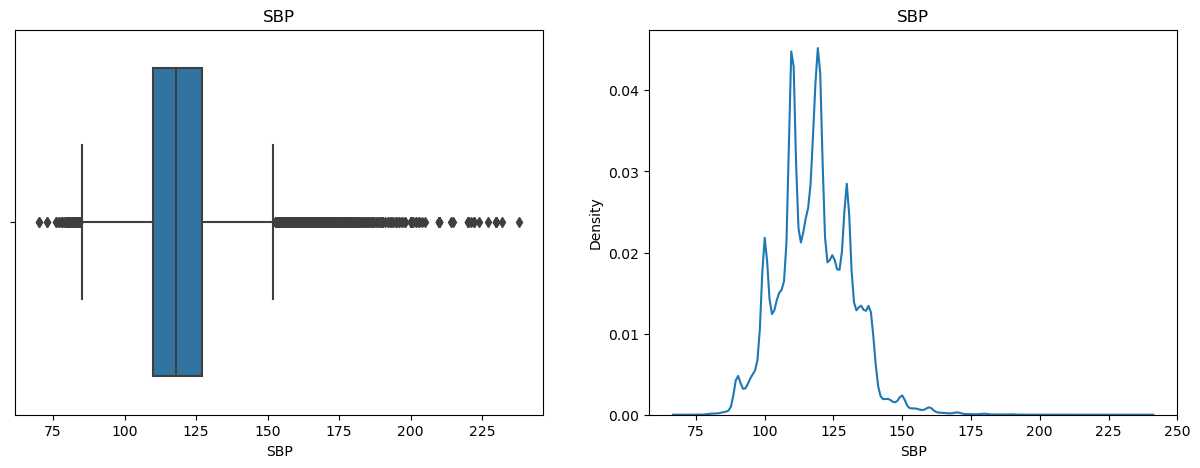

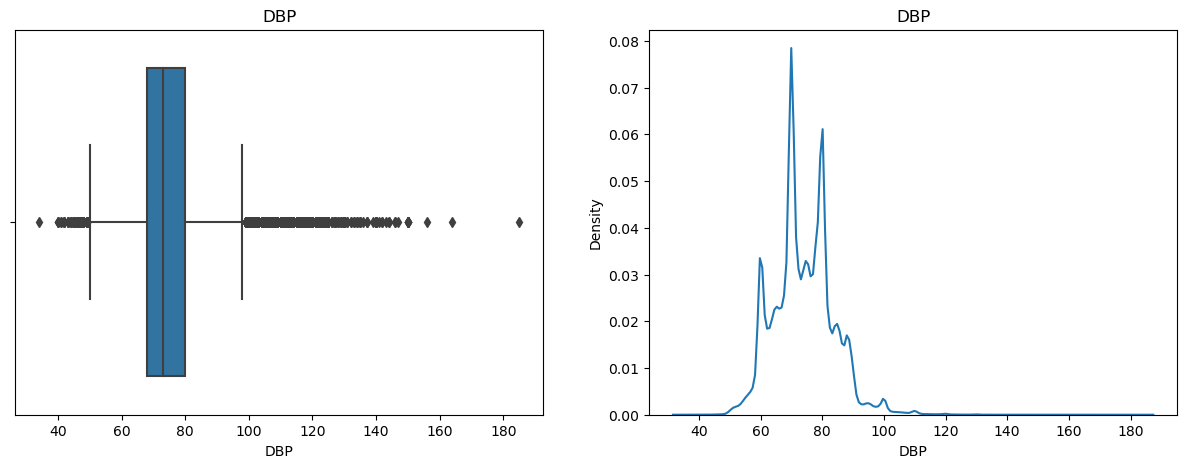

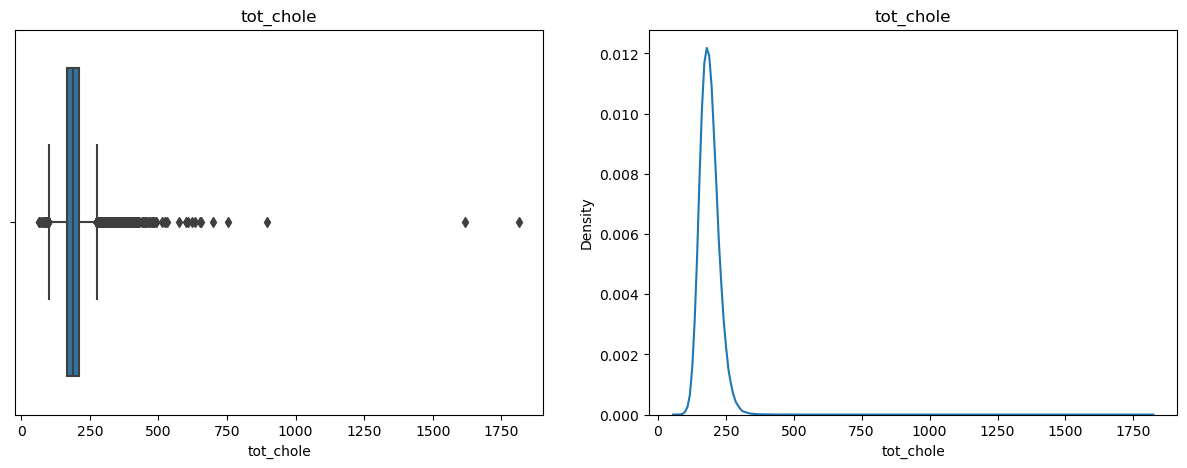

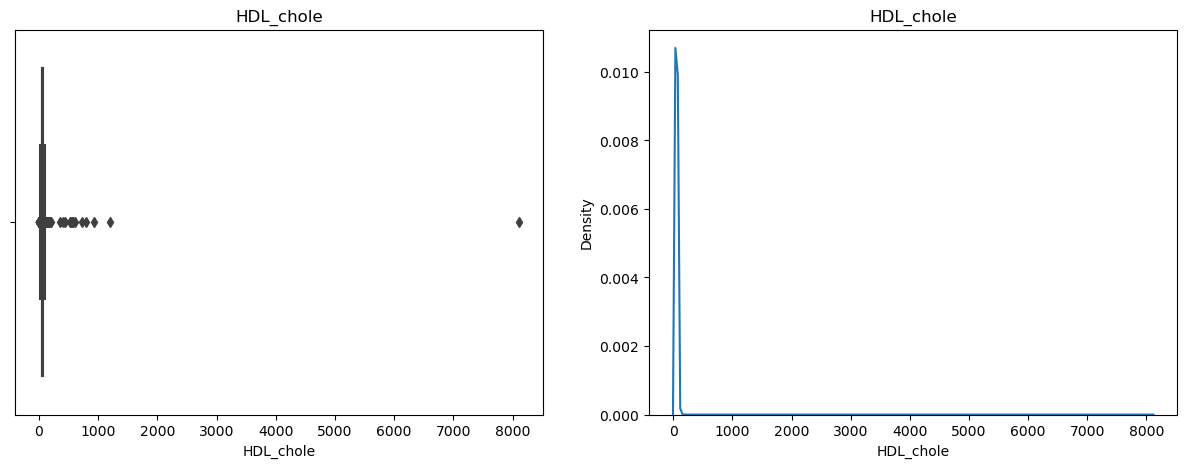

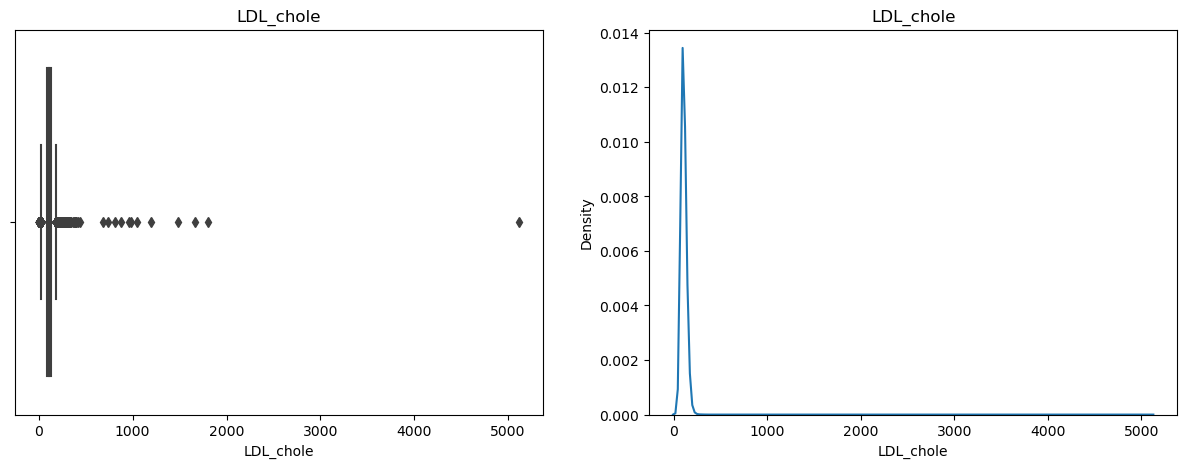

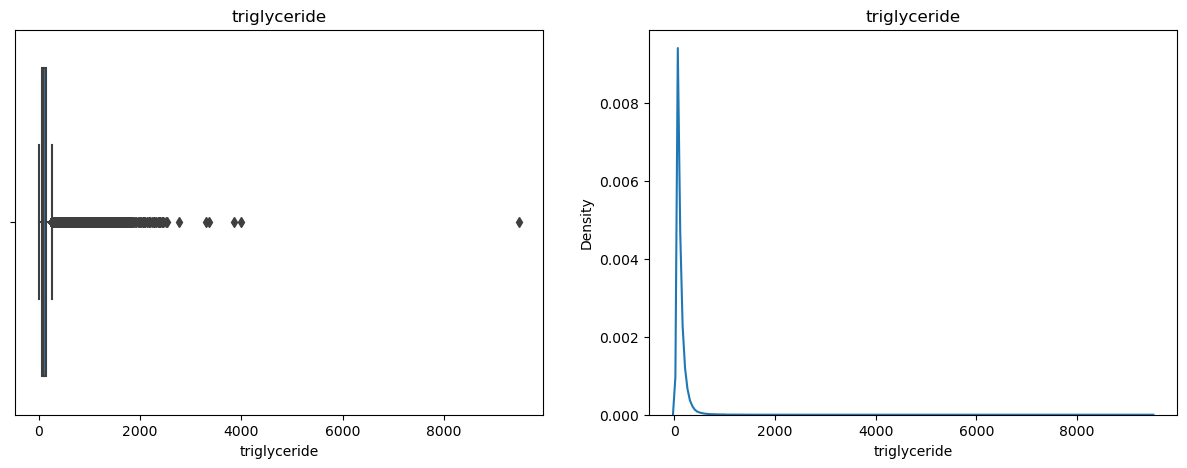

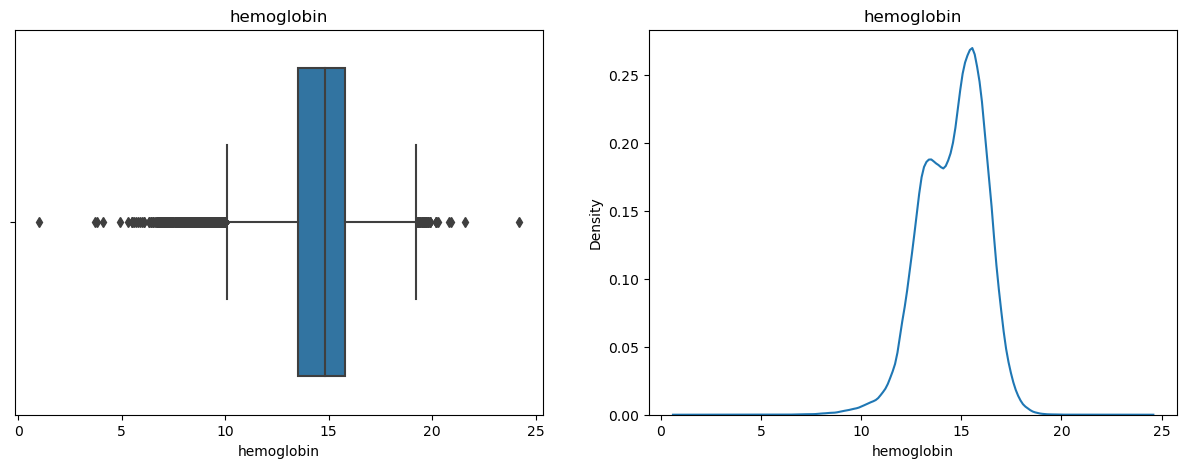

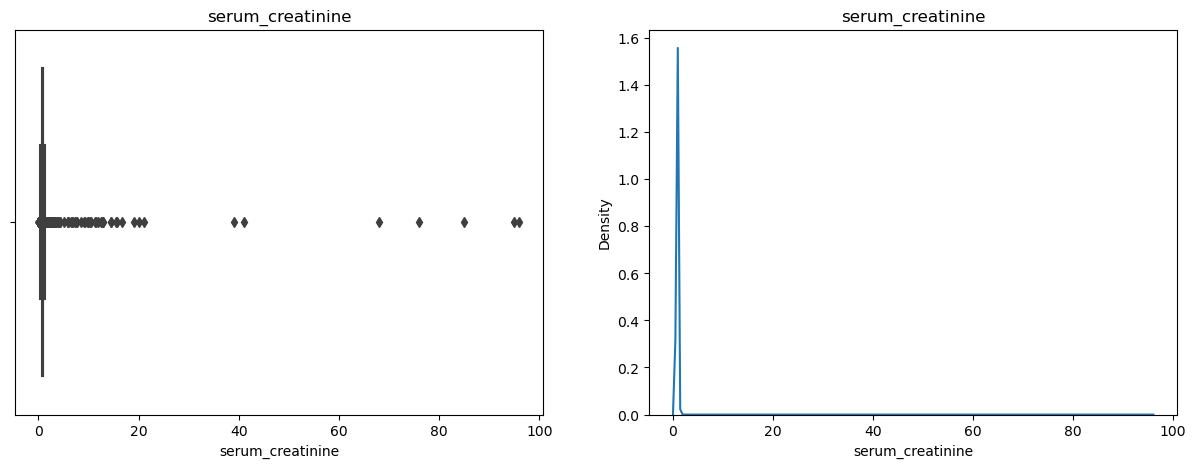

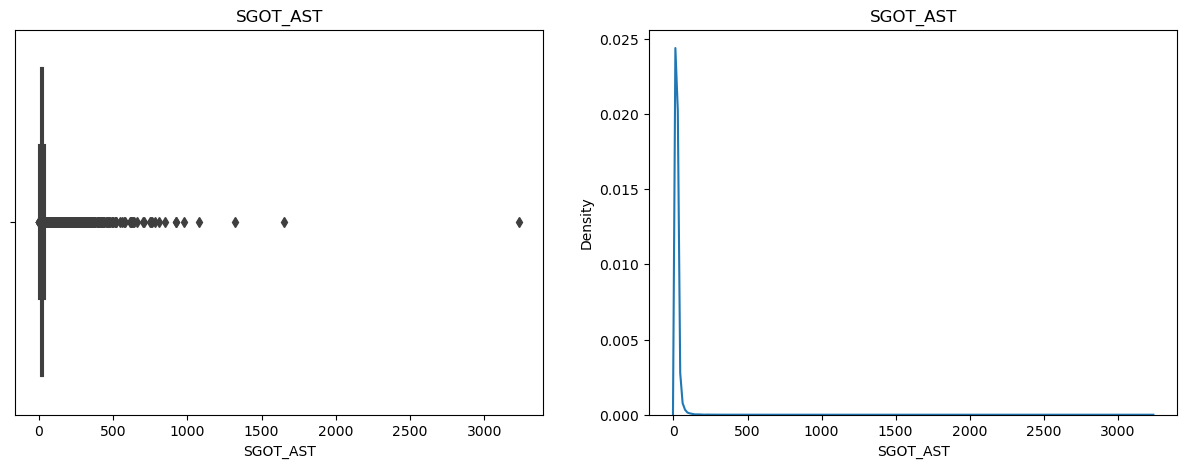

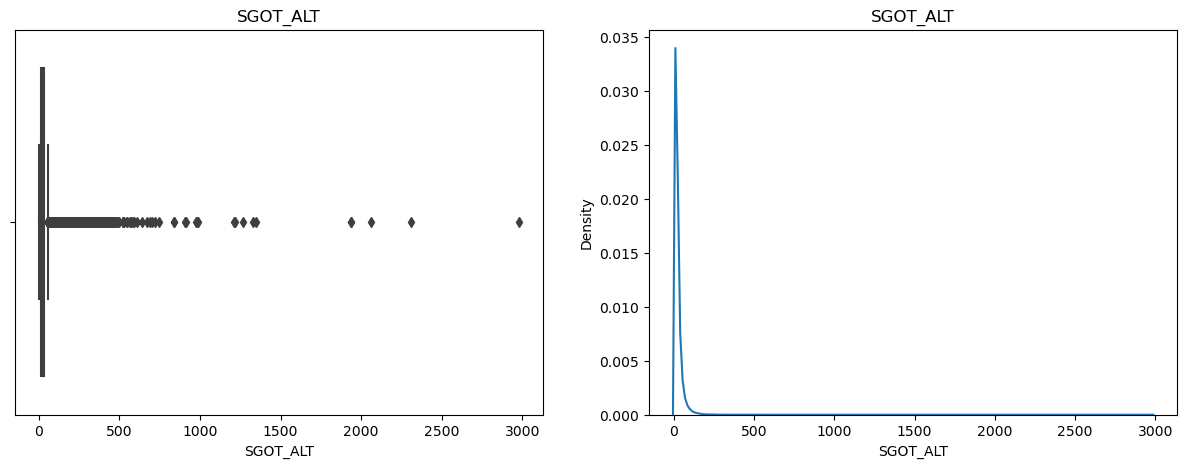

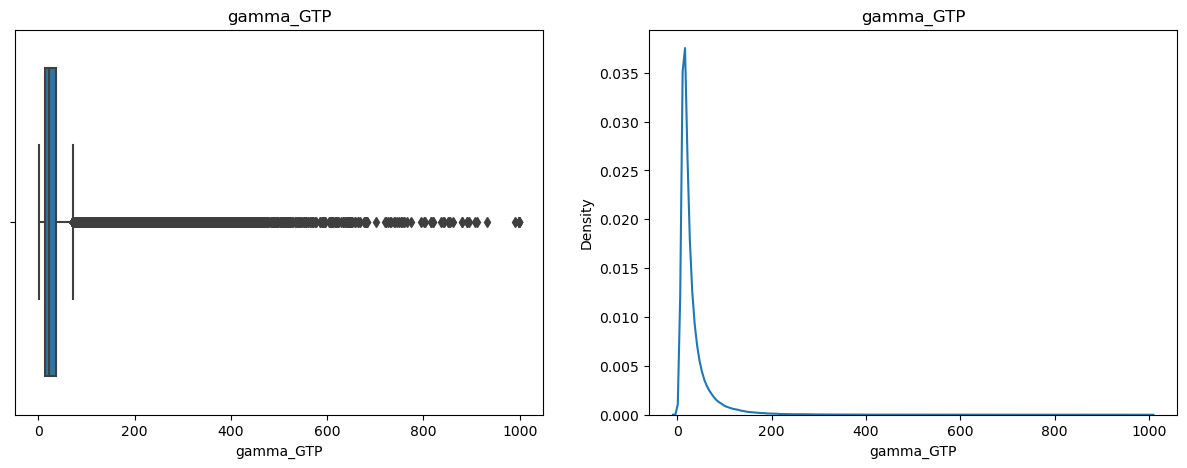

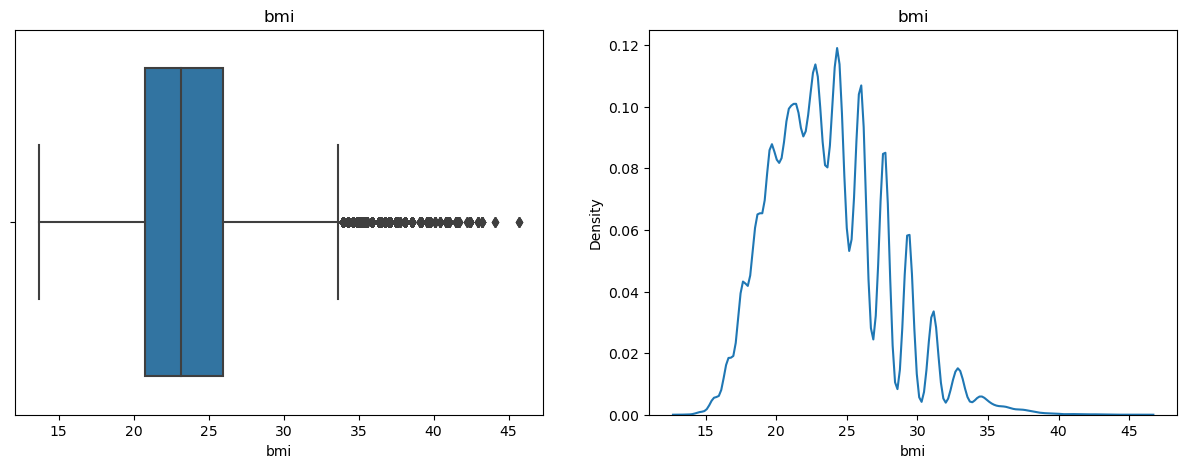

In [13]:
# 연속변인: 박스플롯과 히스토그램
for col in df_2030.drop(cate_list, axis = 1).columns:
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    sns.boxplot(data = df_2030, x = col, ax=axes[0])
    axes[0].set_title(col)
    
    sns.kdeplot(data = df_2030, x = col, ax=axes[1])
    axes[1].set_title(col)
    
    plt.show()

In [103]:
cs_variable = [col for col in df_2030.columns if col not in cate_list]
cs_variable

['sight_left',
 'sight_right',
 'DBP',
 'tot_chole',
 'HDL_chole',
 'LDL_chole',
 'triglyceride',
 'hemoglobin',
 'serum_creatinine',
 'SGOT_AST',
 'SGOT_ALT',
 'gamma_GTP',
 'bmi']

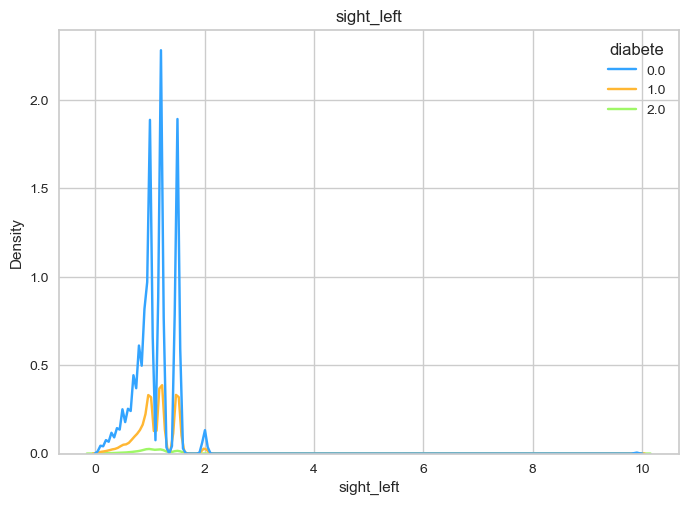

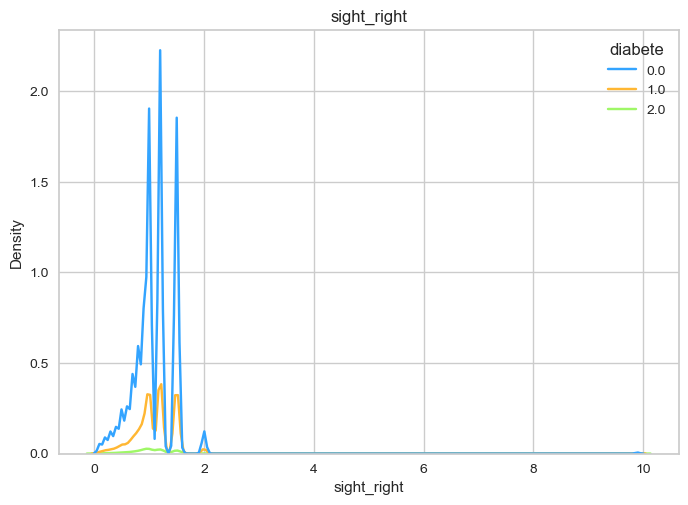

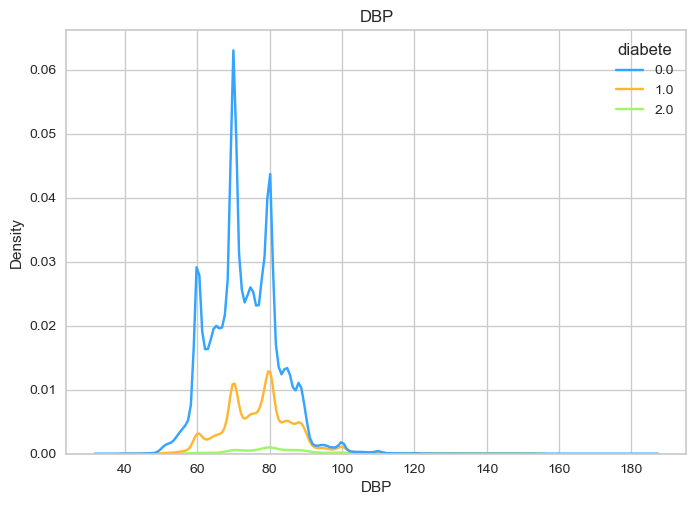

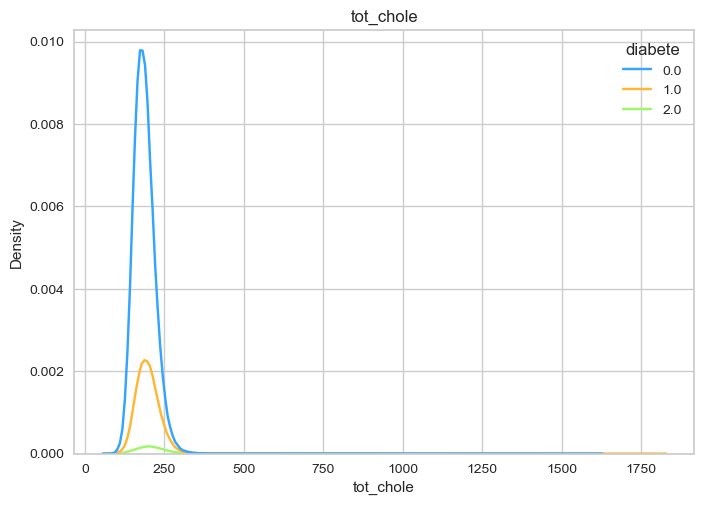

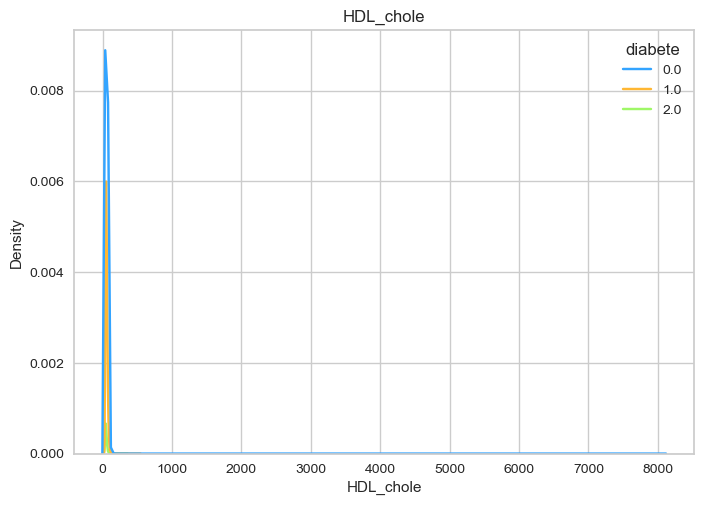

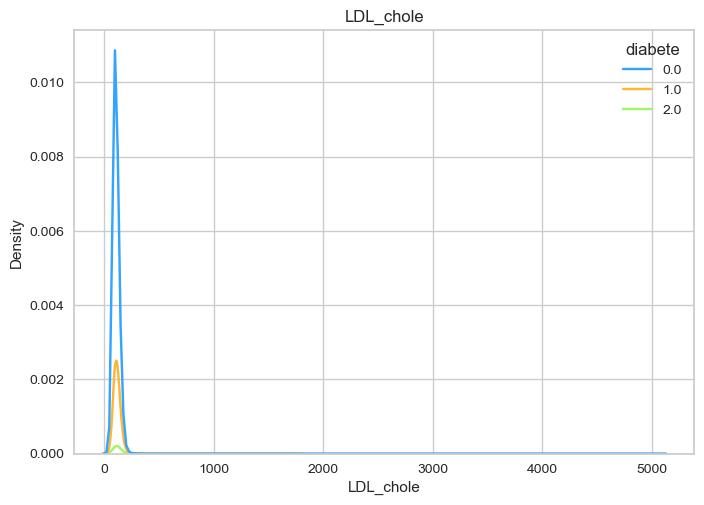

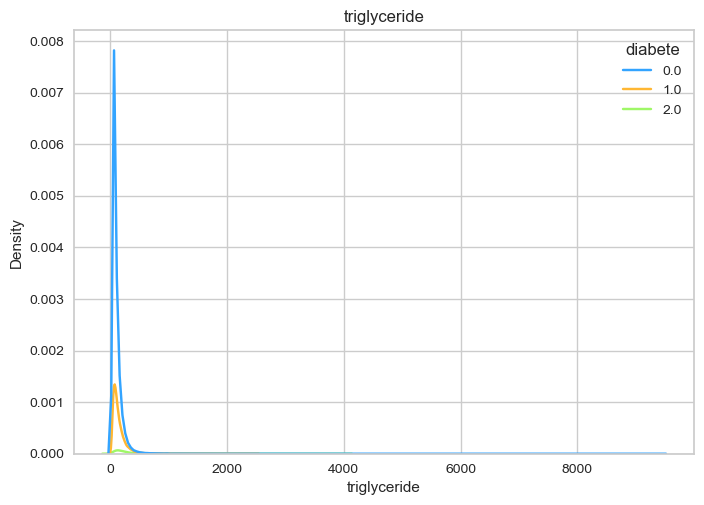

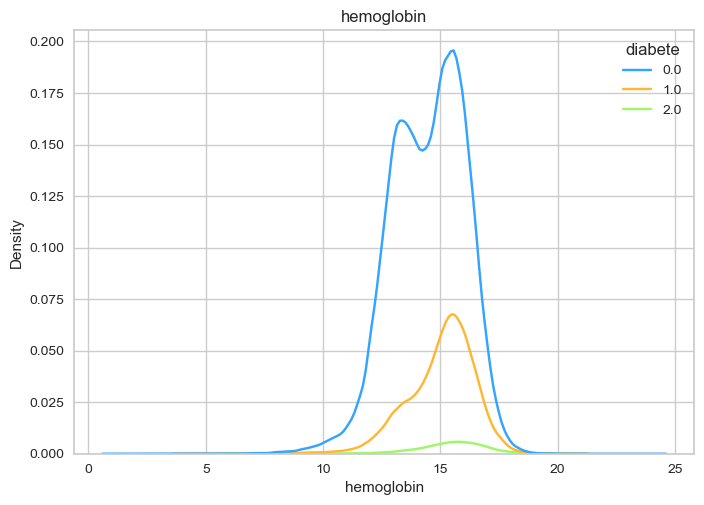

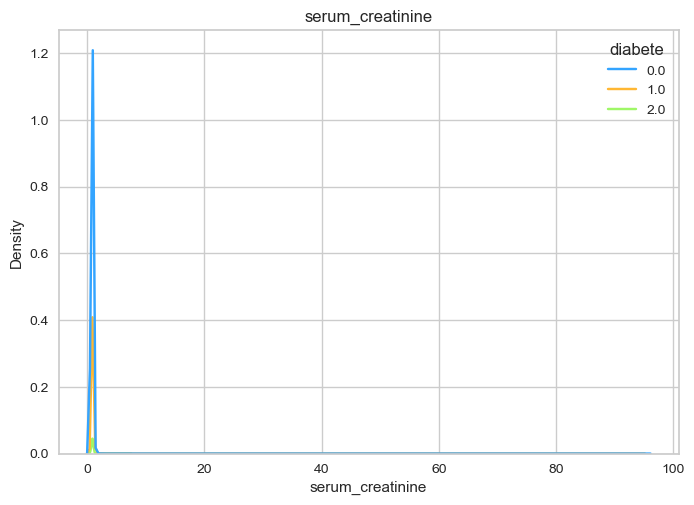

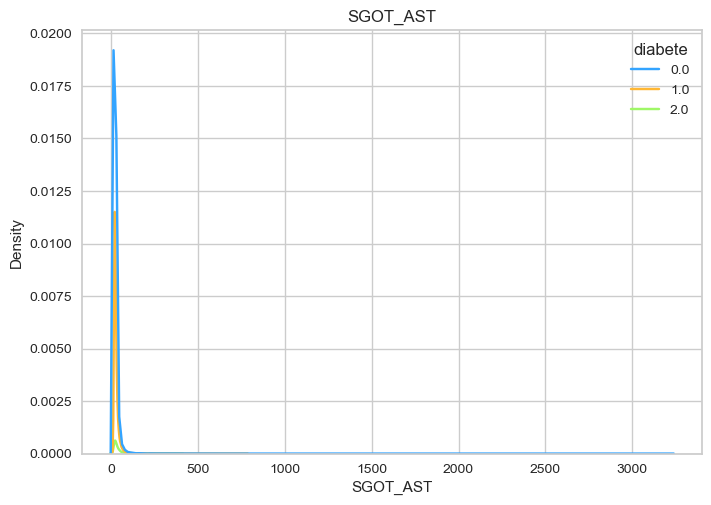

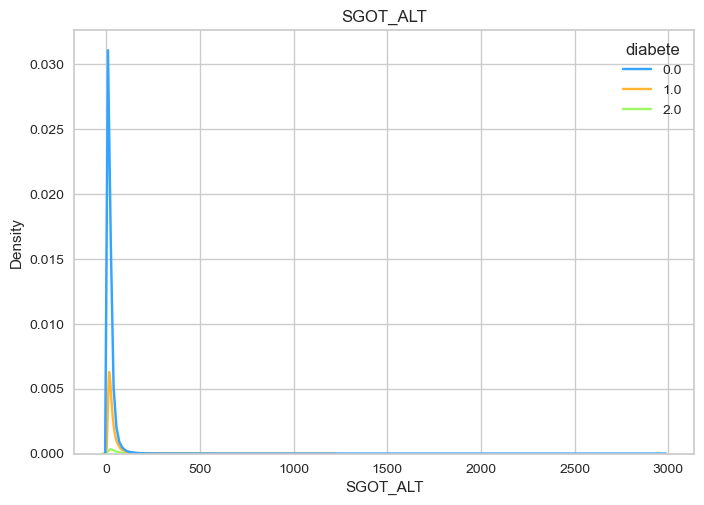

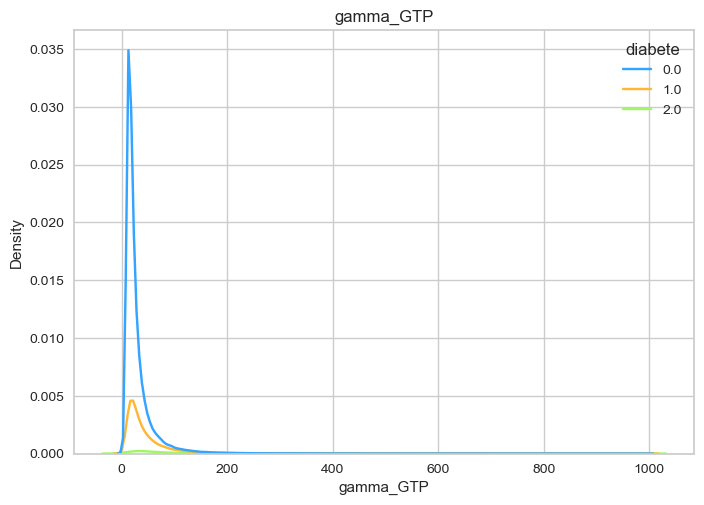

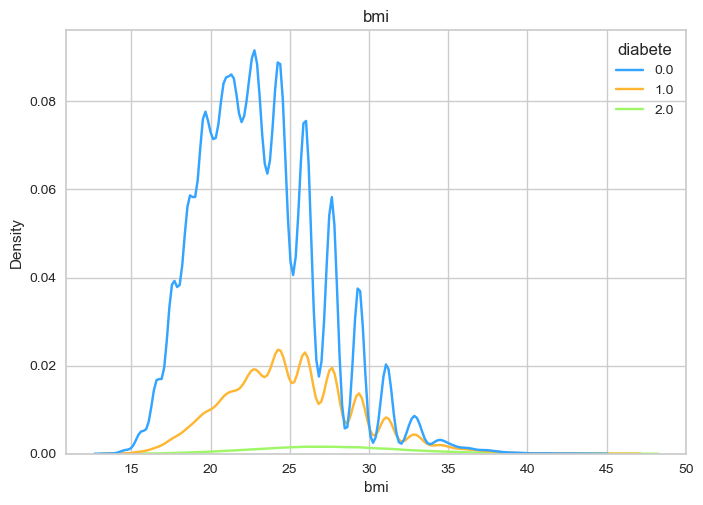

In [104]:
# 연속변인: 범주형 종속변인(diabete)에 따른 히스토그램
for col in cs_variable:    
    sns.kdeplot(data = df_2030, x = col, hue = "diabete",palette=custom_palette)
    plt.title(col)    
    plt.show()

In [93]:
df_2030 = df_2030.drop(['hear_left', 'hear_right'], axis = 1)
df_2030

,sex,age,sight_left,sight_right,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
0,1.0,3.0,1.0,1.0,80.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,0.0,25.951557
1,1.0,2.0,0.9,1.2,82.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1.0,24.691358
2,1.0,3.0,1.2,1.0,80.0,185.0,58.0,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,1.0,0.0,21.224490
3,1.0,2.0,1.2,1.2,72.0,200.0,55.0,129.0,77.0,15.7,1.0,0.9,13.0,16.0,19.0,1.0,1.0,0.0,24.489796
4,0.0,2.0,0.9,1.0,77.0,205.0,53.0,108.0,219.0,14.5,1.0,0.6,21.0,24.0,58.0,1.0,0.0,0.0,19.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248662,0.0,3.0,0.7,0.9,80.0,209.0,57.0,140.0,59.0,12.9,1.0,1.0,25.0,12.0,13.0,1.0,1.0,0.0,27.055151
248663,0.0,3.0,1.0,1.0,69.0,173.0,63.0,92.0,88.0,13.3,1.0,0.7,20.0,17.0,12.0,1.0,0.0,0.0,25.711662
248664,1.0,0.0,1.0,1.5,70.0,211.0,72.0,120.0,92.0,15.4,1.0,0.8,25.0,26.0,50.0,2.0,1.0,0.0,21.224490
248665,1.0,3.0,1.0,1.5,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0.0,0.0,25.951557


In [94]:
df_2030 = df_2030.reset_index(drop = True)
df_2030

,sex,age,sight_left,sight_right,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
0,1.0,3.0,1.0,1.0,80.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,0.0,25.951557
1,1.0,2.0,0.9,1.2,82.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1.0,24.691358
2,1.0,3.0,1.2,1.0,80.0,185.0,58.0,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,1.0,0.0,21.224490
3,1.0,2.0,1.2,1.2,72.0,200.0,55.0,129.0,77.0,15.7,1.0,0.9,13.0,16.0,19.0,1.0,1.0,0.0,24.489796
4,0.0,2.0,0.9,1.0,77.0,205.0,53.0,108.0,219.0,14.5,1.0,0.6,21.0,24.0,58.0,1.0,0.0,0.0,19.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248662,0.0,3.0,0.7,0.9,80.0,209.0,57.0,140.0,59.0,12.9,1.0,1.0,25.0,12.0,13.0,1.0,1.0,0.0,27.055151
248663,0.0,3.0,1.0,1.0,69.0,173.0,63.0,92.0,88.0,13.3,1.0,0.7,20.0,17.0,12.0,1.0,0.0,0.0,25.711662
248664,1.0,0.0,1.0,1.5,70.0,211.0,72.0,120.0,92.0,15.4,1.0,0.8,25.0,26.0,50.0,2.0,1.0,0.0,21.224490
248665,1.0,3.0,1.0,1.5,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0.0,0.0,25.951557


In [74]:
df_2030['SMK_stat_type_cd'] = df_2030['SMK_stat_type_cd'].astype('int')
df_2030['urine_protein'] = df_2030['urine_protein'].astype('int')
df_2030


,sex,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
0,1,3,90.0,1.0,1.0,0,0,120.0,80.0,193.0,48.0,126.0,92.0,17.1,1,1.0,21.0,35.0,40.0,1,1,0,25.951557
1,1,2,89.0,0.9,1.2,0,0,130.0,82.0,228.0,55.0,148.0,121.0,15.8,1,0.9,20.0,36.0,27.0,3,0,1,24.691358
2,1,3,84.2,1.2,1.0,0,0,132.0,80.0,185.0,58.0,107.0,101.0,14.4,1,0.8,18.0,18.0,35.0,3,1,0,21.224490
3,1,2,88.0,1.2,1.2,0,0,118.0,72.0,200.0,55.0,129.0,77.0,15.7,1,0.9,13.0,16.0,19.0,1,1,0,24.489796
4,0,2,76.0,0.9,1.0,0,0,129.0,77.0,205.0,53.0,108.0,219.0,14.5,1,0.6,21.0,24.0,58.0,1,0,0,19.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248662,0,3,70.0,0.7,0.9,0,0,110.0,80.0,209.0,57.0,140.0,59.0,12.9,1,1.0,25.0,12.0,13.0,1,1,0,27.055151
248663,0,3,81.0,1.0,1.0,0,0,113.0,69.0,173.0,63.0,92.0,88.0,13.3,1,0.7,20.0,17.0,12.0,1,0,0,25.711662
248664,1,0,74.5,1.0,1.5,0,0,105.0,70.0,211.0,72.0,120.0,92.0,15.4,1,0.8,25.0,26.0,50.0,2,1,0,21.224490
248665,1,3,86.0,1.0,1.5,0,0,119.0,83.0,133.0,40.0,84.0,45.0,15.8,1,1.1,14.0,17.0,15.0,1,0,0,25.951557


In [75]:
df_2030

,sex,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
0,1,3,90.0,1.0,1.0,0,0,120.0,80.0,193.0,48.0,126.0,92.0,17.1,1,1.0,21.0,35.0,40.0,1,1,0,25.951557
1,1,2,89.0,0.9,1.2,0,0,130.0,82.0,228.0,55.0,148.0,121.0,15.8,1,0.9,20.0,36.0,27.0,3,0,1,24.691358
2,1,3,84.2,1.2,1.0,0,0,132.0,80.0,185.0,58.0,107.0,101.0,14.4,1,0.8,18.0,18.0,35.0,3,1,0,21.224490
3,1,2,88.0,1.2,1.2,0,0,118.0,72.0,200.0,55.0,129.0,77.0,15.7,1,0.9,13.0,16.0,19.0,1,1,0,24.489796
4,0,2,76.0,0.9,1.0,0,0,129.0,77.0,205.0,53.0,108.0,219.0,14.5,1,0.6,21.0,24.0,58.0,1,0,0,19.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248662,0,3,70.0,0.7,0.9,0,0,110.0,80.0,209.0,57.0,140.0,59.0,12.9,1,1.0,25.0,12.0,13.0,1,1,0,27.055151
248663,0,3,81.0,1.0,1.0,0,0,113.0,69.0,173.0,63.0,92.0,88.0,13.3,1,0.7,20.0,17.0,12.0,1,0,0,25.711662
248664,1,0,74.5,1.0,1.5,0,0,105.0,70.0,211.0,72.0,120.0,92.0,15.4,1,0.8,25.0,26.0,50.0,2,1,0,21.224490
248665,1,3,86.0,1.0,1.5,0,0,119.0,83.0,133.0,40.0,84.0,45.0,15.8,1,1.1,14.0,17.0,15.0,1,0,0,25.951557


In [24]:
df_2030.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'SBP', 'DBP', 'tot_chole', 'HDL_chole', 'LDL_chole',
       'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine',
       'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN',
       'diabete', 'bmi'],
      dtype='object')

In [76]:
# waistline가 999cm인 건 말이 안됨
# 결측치로 처리 후, KNN imputation 진행
df_2030[df_2030.waistline>300]

,sex,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
2826,0,2,999.0,1.0,1.0,0,0,100.0,64.0,197.0,70.0,91.0,180.0,12.6,1,0.8,12.0,8.0,11.0,1,0,0,21.484375
5962,0,1,999.0,0.9,0.9,0,0,118.0,78.0,296.0,89.0,160.0,234.0,14.1,3,1.1,22.0,10.0,14.0,1,0,0,23.437500
7677,0,1,999.0,0.8,1.0,0,0,102.0,60.0,190.0,75.0,99.0,80.0,11.1,1,0.6,14.0,12.0,10.0,1,0,0,21.484375
14922,0,1,999.0,1.5,1.5,0,0,106.0,66.0,234.0,83.0,90.0,306.0,11.2,1,0.6,14.0,14.0,10.0,1,0,0,25.390625
17103,0,2,999.0,1.0,1.5,0,0,114.0,64.0,280.0,78.0,146.0,280.0,10.4,1,0.8,15.0,6.0,10.0,1,0,0,24.973985
23076,0,2,999.0,1.2,1.5,0,0,101.0,53.0,236.0,80.0,123.0,165.0,10.2,1,0.6,36.0,45.0,7.0,1,0,0,19.531250
28748,0,1,999.0,0.2,0.2,0,0,119.0,69.0,235.0,62.0,135.0,190.0,11.9,1,0.4,22.0,11.0,8.0,1,0,0,25.711662
30247,0,0,999.0,1.5,1.5,0,0,100.0,65.0,209.0,86.0,108.0,75.0,12.1,1,0.8,15.0,12.0,8.0,1,0,0,22.892820
31498,0,2,999.0,0.9,0.7,0,0,107.0,68.0,220.0,111.0,91.0,86.0,11.2,1,0.4,27.0,25.0,13.0,1,0,0,24.973985
33249,0,3,999.0,0.9,0.9,0,0,110.0,70.0,322.0,108.0,148.0,331.0,12.7,1,0.6,19.0,13.0,11.0,1,0,0,21.484375


In [77]:
df_2030['waistline'] = np.where(df_2030.waistline > 300, np.nan, df_2030.waistline)
df_2030

,sex,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
0,1,3,90.0,1.0,1.0,0,0,120.0,80.0,193.0,48.0,126.0,92.0,17.1,1,1.0,21.0,35.0,40.0,1,1,0,25.951557
1,1,2,89.0,0.9,1.2,0,0,130.0,82.0,228.0,55.0,148.0,121.0,15.8,1,0.9,20.0,36.0,27.0,3,0,1,24.691358
2,1,3,84.2,1.2,1.0,0,0,132.0,80.0,185.0,58.0,107.0,101.0,14.4,1,0.8,18.0,18.0,35.0,3,1,0,21.224490
3,1,2,88.0,1.2,1.2,0,0,118.0,72.0,200.0,55.0,129.0,77.0,15.7,1,0.9,13.0,16.0,19.0,1,1,0,24.489796
4,0,2,76.0,0.9,1.0,0,0,129.0,77.0,205.0,53.0,108.0,219.0,14.5,1,0.6,21.0,24.0,58.0,1,0,0,19.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248662,0,3,70.0,0.7,0.9,0,0,110.0,80.0,209.0,57.0,140.0,59.0,12.9,1,1.0,25.0,12.0,13.0,1,1,0,27.055151
248663,0,3,81.0,1.0,1.0,0,0,113.0,69.0,173.0,63.0,92.0,88.0,13.3,1,0.7,20.0,17.0,12.0,1,0,0,25.711662
248664,1,0,74.5,1.0,1.5,0,0,105.0,70.0,211.0,72.0,120.0,92.0,15.4,1,0.8,25.0,26.0,50.0,2,1,0,21.224490
248665,1,3,86.0,1.0,1.5,0,0,119.0,83.0,133.0,40.0,84.0,45.0,15.8,1,1.1,14.0,17.0,15.0,1,0,0,25.951557


In [78]:
df_2030.columns

Index(['sex', 'age', 'waistline', 'sight_left', 'sight_right', 'hear_left',
       'hear_right', 'SBP', 'DBP', 'tot_chole', 'HDL_chole', 'LDL_chole',
       'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine',
       'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN',
       'diabete', 'bmi'],
      dtype='object')

In [79]:
from sklearn.impute import KNNImputer
columns = df_2030.columns

imputer = KNNImputer()
df_2030 = imputer.fit_transform(df_2030)
df_2030 = pd.DataFrame(df_2030, columns = columns)
df_2030

,sex,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
0,1.0,3.0,90.0,1.0,1.0,0.0,0.0,120.0,80.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,0.0,25.951557
1,1.0,2.0,89.0,0.9,1.2,0.0,0.0,130.0,82.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1.0,24.691358
2,1.0,3.0,84.2,1.2,1.0,0.0,0.0,132.0,80.0,185.0,58.0,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,1.0,0.0,21.224490
3,1.0,2.0,88.0,1.2,1.2,0.0,0.0,118.0,72.0,200.0,55.0,129.0,77.0,15.7,1.0,0.9,13.0,16.0,19.0,1.0,1.0,0.0,24.489796
4,0.0,2.0,76.0,0.9,1.0,0.0,0.0,129.0,77.0,205.0,53.0,108.0,219.0,14.5,1.0,0.6,21.0,24.0,58.0,1.0,0.0,0.0,19.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248662,0.0,3.0,70.0,0.7,0.9,0.0,0.0,110.0,80.0,209.0,57.0,140.0,59.0,12.9,1.0,1.0,25.0,12.0,13.0,1.0,1.0,0.0,27.055151
248663,0.0,3.0,81.0,1.0,1.0,0.0,0.0,113.0,69.0,173.0,63.0,92.0,88.0,13.3,1.0,0.7,20.0,17.0,12.0,1.0,0.0,0.0,25.711662
248664,1.0,0.0,74.5,1.0,1.5,0.0,0.0,105.0,70.0,211.0,72.0,120.0,92.0,15.4,1.0,0.8,25.0,26.0,50.0,2.0,1.0,0.0,21.224490
248665,1.0,3.0,86.0,1.0,1.5,0.0,0.0,119.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0.0,0.0,25.951557


<AxesSubplot:xlabel='waistline', ylabel='Density'>

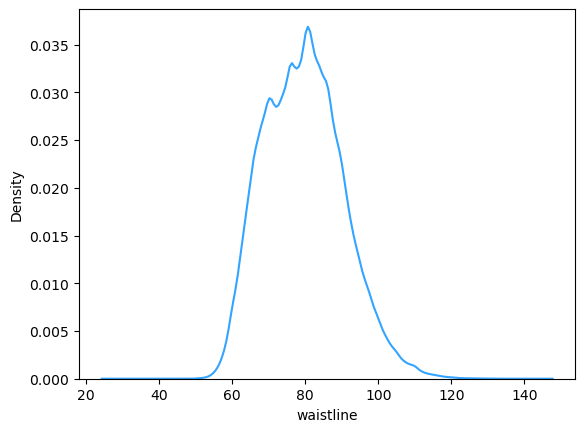

In [80]:
sns.kdeplot(df_2030.waistline)

In [97]:
df_2030

,sex,age,sight_left,sight_right,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
0,1.0,3.0,1.0,1.0,80.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,0.0,25.951557
1,1.0,2.0,0.9,1.2,82.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1.0,24.691358
2,1.0,3.0,1.2,1.0,80.0,185.0,58.0,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,1.0,0.0,21.224490
3,1.0,2.0,1.2,1.2,72.0,200.0,55.0,129.0,77.0,15.7,1.0,0.9,13.0,16.0,19.0,1.0,1.0,0.0,24.489796
4,0.0,2.0,0.9,1.0,77.0,205.0,53.0,108.0,219.0,14.5,1.0,0.6,21.0,24.0,58.0,1.0,0.0,0.0,19.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248662,0.0,3.0,0.7,0.9,80.0,209.0,57.0,140.0,59.0,12.9,1.0,1.0,25.0,12.0,13.0,1.0,1.0,0.0,27.055151
248663,0.0,3.0,1.0,1.0,69.0,173.0,63.0,92.0,88.0,13.3,1.0,0.7,20.0,17.0,12.0,1.0,0.0,0.0,25.711662
248664,1.0,0.0,1.0,1.5,70.0,211.0,72.0,120.0,92.0,15.4,1.0,0.8,25.0,26.0,50.0,2.0,1.0,0.0,21.224490
248665,1.0,3.0,1.0,1.5,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0.0,0.0,25.951557


In [28]:
df_2030[df_2030.serum_creatinine>50]

,sex,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
55064,1,1,1.80,100,97.0,0.2,1.0,146.0,90.0,163.0,63.0,82.0,88.0,15.9,1,85.0,19.0,12.0,20.0,1,1,0,30.864198
75693,0,3,1.55,45,68.0,1.0,1.5,110.0,70.0,182.0,80.0,88.0,67.0,14.0,1,95.0,17.0,14.0,12.0,1,0,1,18.730489
191338,0,3,1.55,45,64.0,1.2,1.0,117.0,74.0,183.0,72.0,100.0,53.0,15.3,2,76.0,14.0,16.0,10.0,1,0,0,18.730489
194590,0,2,1.60,60,74.3,1.2,1.2,93.0,62.0,144.0,64.0,68.0,60.0,12.3,1,68.0,16.0,21.0,16.0,1,0,0,23.437500
202118,1,2,1.65,65,81.0,1.0,1.0,134.0,83.0,174.0,64.0,95.0,71.0,13.3,1,96.0,19.0,23.0,18.0,3,0,0,23.875115


In [29]:
df_2030[df_2030.HDL_chole>3000]

,sex,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
1789,0,0,1.6,55,67.0,0.3,0.5,105.0,70.0,1619.0,8110.0,5119.0,9490.0,14.0,1,0.8,21.0,15.0,18.0,1,0,0,21.484375


In [30]:
df_2030[df_2030.LDL_chole>3000]

,sex,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
1789,0,0,1.6,55,67.0,0.3,0.5,105.0,70.0,1619.0,8110.0,5119.0,9490.0,14.0,1,0.8,21.0,15.0,18.0,1,0,0,21.484375


<AxesSubplot:>

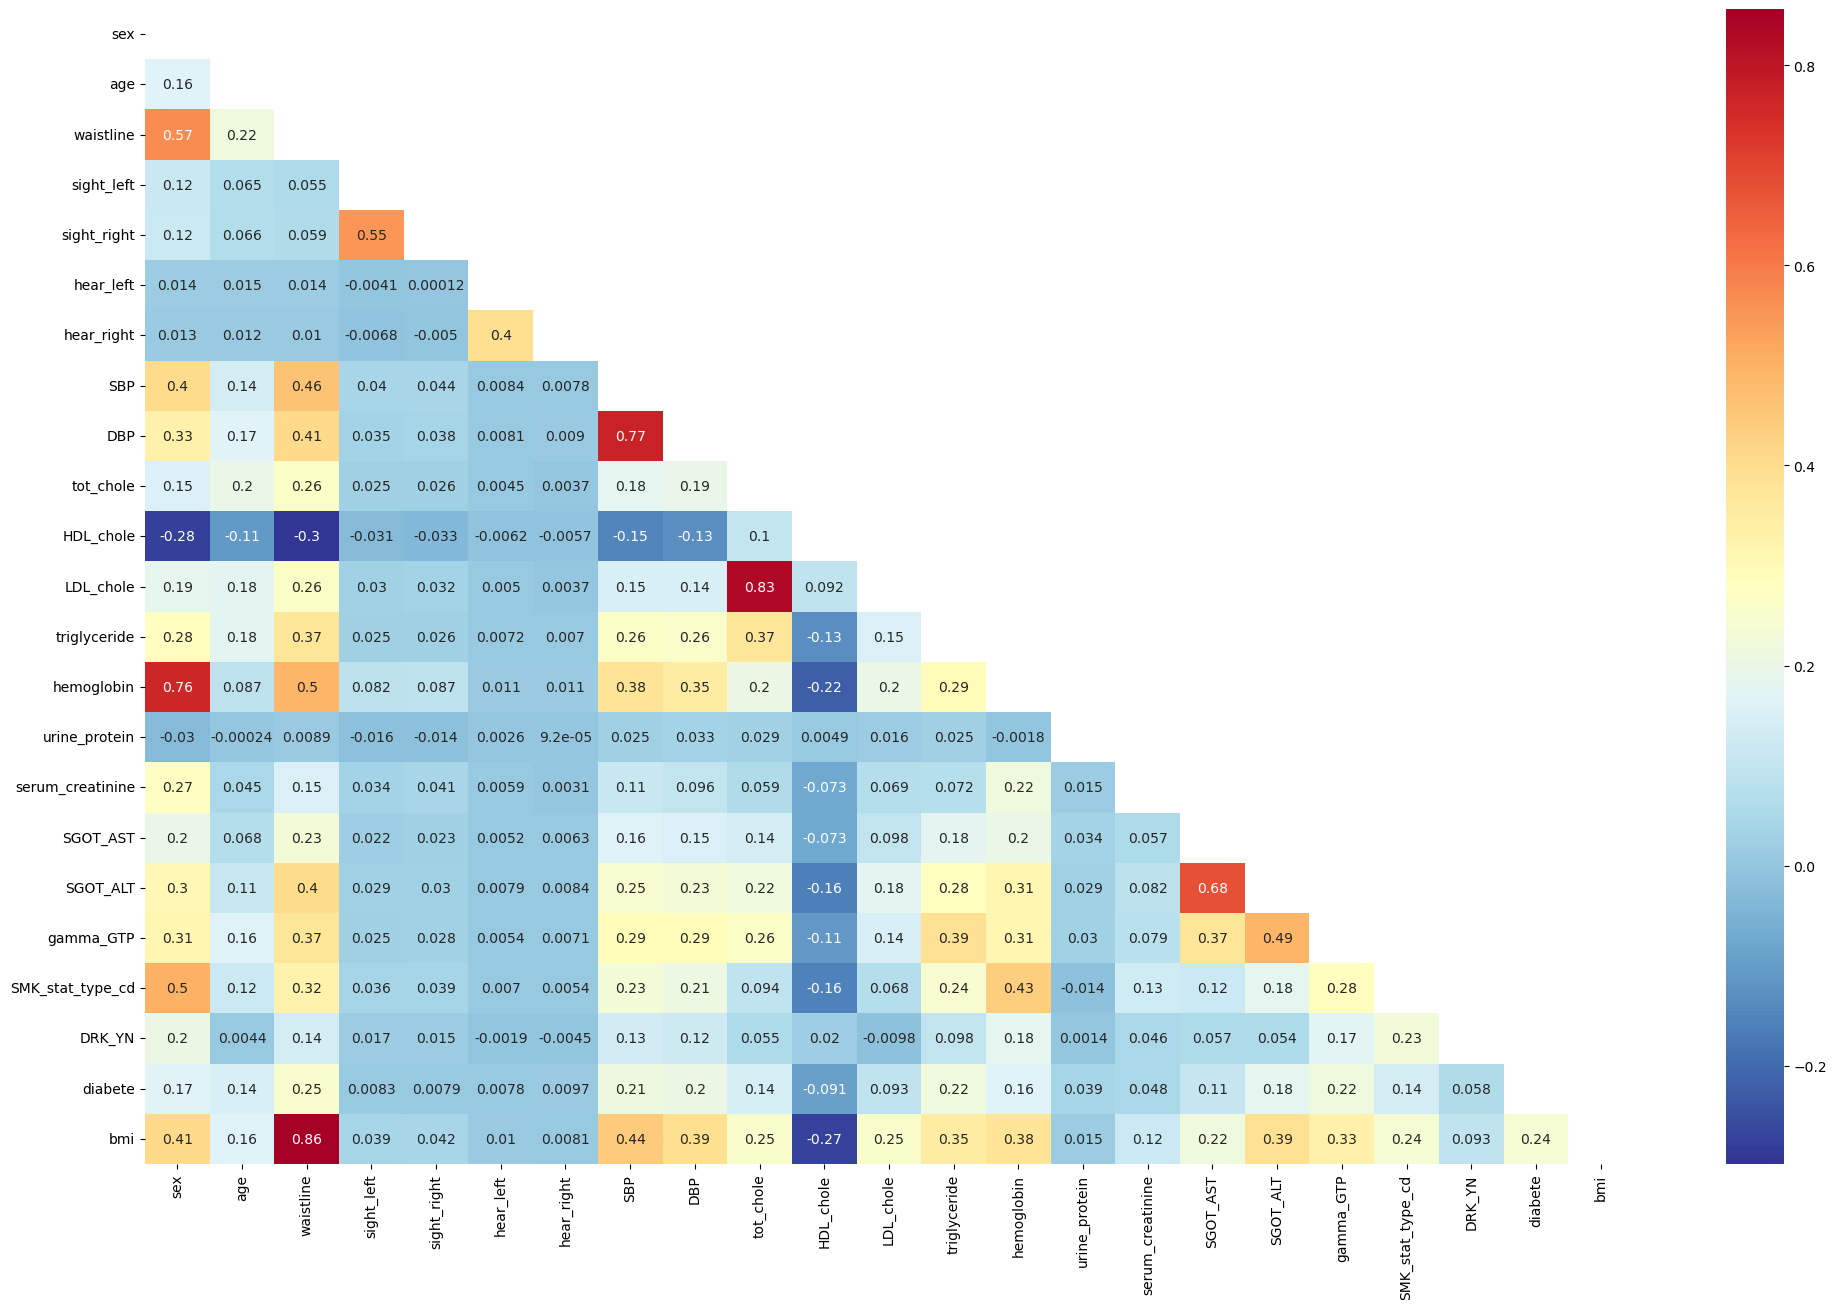

In [81]:
plt.figure(figsize=(24, 15))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.triu(np.ones_like(df_2030.corr(), dtype=bool))

sns.heatmap(df_2030.corr(),
            cmap = 'RdYlBu_r',
            mask=mask,
            annot=True)

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_dropped = df_2030.drop("diabete", axis = 1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_dropped.values, i) for i in range(df_2030.shape[1])]
vif["features"] = df_2030.columns
vif = vif.sort_values(by = 'VIF', ascending=False).reset_index(drop=True)
vif

,VIF,features
0,250.767875,waistline
1,210.488276,SBP
2,154.880072,DBP
3,145.779792,bmi
4,136.063652,hemoglobin
5,127.030708,tot_chole
6,43.260012,LDL_chole
7,11.742748,sight_left
8,11.456064,sight_right
9,9.487937,urine_protein


<AxesSubplot:xlabel='VIF', ylabel='features'>

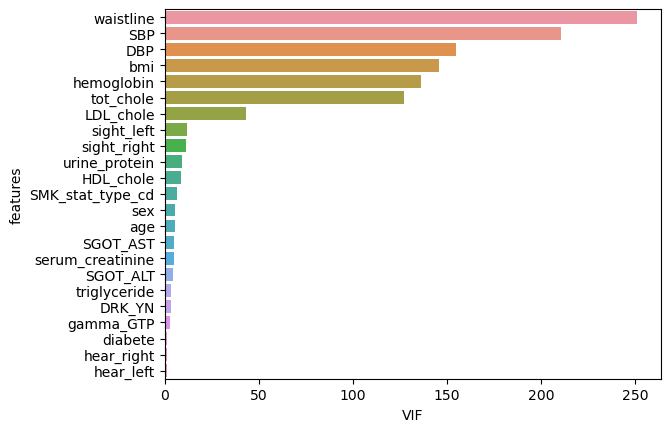

In [83]:
sns.barplot(data = vif.sort_values(by = 'VIF', ascending=False).reset_index(drop=True),
           y = "features",
           x = "VIF")

In [87]:
df_2030 = df_2030.drop(['waistline', 'SBP'], axis = 1)
df_2030

,sex,age,sight_left,sight_right,hear_left,hear_right,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
0,1.0,3.0,1.0,1.0,0.0,0.0,80.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,0.0,25.951557
1,1.0,2.0,0.9,1.2,0.0,0.0,82.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1.0,24.691358
2,1.0,3.0,1.2,1.0,0.0,0.0,80.0,185.0,58.0,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,1.0,0.0,21.224490
3,1.0,2.0,1.2,1.2,0.0,0.0,72.0,200.0,55.0,129.0,77.0,15.7,1.0,0.9,13.0,16.0,19.0,1.0,1.0,0.0,24.489796
4,0.0,2.0,0.9,1.0,0.0,0.0,77.0,205.0,53.0,108.0,219.0,14.5,1.0,0.6,21.0,24.0,58.0,1.0,0.0,0.0,19.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248662,0.0,3.0,0.7,0.9,0.0,0.0,80.0,209.0,57.0,140.0,59.0,12.9,1.0,1.0,25.0,12.0,13.0,1.0,1.0,0.0,27.055151
248663,0.0,3.0,1.0,1.0,0.0,0.0,69.0,173.0,63.0,92.0,88.0,13.3,1.0,0.7,20.0,17.0,12.0,1.0,0.0,0.0,25.711662
248664,1.0,0.0,1.0,1.5,0.0,0.0,70.0,211.0,72.0,120.0,92.0,15.4,1.0,0.8,25.0,26.0,50.0,2.0,1.0,0.0,21.224490
248665,1.0,3.0,1.0,1.5,0.0,0.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0.0,0.0,25.951557


In [106]:
df_2030.diabete.value_counts()

0.0    194394
1.0     49606
2.0      4667
Name: diabete, dtype: int64

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_dropped = df_2030.drop("diabete", axis = 1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_2030.values, i) for i in range(df_2030.shape[1])]
vif["features"] = df_2030.columns
vif = vif.sort_values(by = 'VIF', ascending=False).reset_index(drop=True)
vif

,VIF,features
0,125.438055,tot_chole
1,117.875120,hemoglobin
2,73.198139,DBP
3,52.740587,bmi
4,42.953820,LDL_chole
5,11.734012,sight_left
6,11.448386,sight_right
7,9.447009,urine_protein
8,8.883615,HDL_chole
9,6.602926,SMK_stat_type_cd


In [95]:
# 데이터 준비
# X: 독립변수 데이터프레임, y: 종속변수 시리즈
X = df_2030.drop(['diabete'], axis=1)  # 'target'은 종속변수의 열 이름입니다.
y = df_2030['diabete']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 라쏘 회귀 모델 생성 및 학습
lasso_cv = LassoCV(cv=5)  # cv는 교차 검증에 사용할 부분의 개수
lasso_cv.fit(X_scaled, y)

# 최적의 알파 출력
print('최적의 알파: ', lasso_cv.alpha_)

# 계수가 0인 특성 추출
zero_coef_features = X.columns[lasso_cv.coef_ == 0]
print('제거할 특성: ', zero_coef_features)

최적의 알파:  0.0005259026678224211
제거할 특성:  Index([], dtype='object')


In [96]:
df_2030.to_csv("df_2030_ver_2.csv", index = False)

In [92]:
# 클래스 불균형 해소 안함
# 제거한 변수: serum_creatinine, weight', 'tot_chole, sex', 'height', 'waistline
from pycaret.classification import *
exp_name = setup(data =  df_2030.sample(n=10000),  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

,Description,Value
0,Session id,1473
1,Target,diabete
2,Target type,Multiclass
3,Original data shape,"(10000, 21)"
4,Transformed data shape,"(10000, 21)"
5,Transformed train set shape,"(7000, 21)"
6,Transformed test set shape,"(3000, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7474,0.6047,0.7474,0.6773,0.7012,0.0721,0.0833,7.5350
nb,Naive Bayes,0.7250,0.6870,0.7250,0.7209,0.7160,0.1927,0.1980,8.1180
svm,SVM - Linear Kernel,0.7199,0.0000,0.7199,0.6906,0.6766,0.0976,0.1198,7.0270


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [3]:
df_2030 = pd.read_csv("df_2030_ver_2.csv")
df_2030

,sex,age,sight_left,sight_right,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
0,1.0,3.0,1.0,1.0,80.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,0.0,25.951557
1,1.0,2.0,0.9,1.2,82.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1.0,24.691358
2,1.0,3.0,1.2,1.0,80.0,185.0,58.0,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,1.0,0.0,21.224490
3,1.0,2.0,1.2,1.2,72.0,200.0,55.0,129.0,77.0,15.7,1.0,0.9,13.0,16.0,19.0,1.0,1.0,0.0,24.489796
4,0.0,2.0,0.9,1.0,77.0,205.0,53.0,108.0,219.0,14.5,1.0,0.6,21.0,24.0,58.0,1.0,0.0,0.0,19.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248662,0.0,3.0,0.7,0.9,80.0,209.0,57.0,140.0,59.0,12.9,1.0,1.0,25.0,12.0,13.0,1.0,1.0,0.0,27.055151
248663,0.0,3.0,1.0,1.0,69.0,173.0,63.0,92.0,88.0,13.3,1.0,0.7,20.0,17.0,12.0,1.0,0.0,0.0,25.711662
248664,1.0,0.0,1.0,1.5,70.0,211.0,72.0,120.0,92.0,15.4,1.0,0.8,25.0,26.0,50.0,2.0,1.0,0.0,21.224490
248665,1.0,3.0,1.0,1.5,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0.0,0.0,25.951557


### Reduce Data Imbalancement: One-sided selection (downsampling)

In [8]:
df_2030.diabete.value_counts()

0.0    194394
1.0     49606
2.0      4667
Name: diabete, dtype: int64

In [9]:
# One-sided selection
oss = OneSidedSelection(random_state=42,
                       sampling_strategy = 'majority')

sample_for_oss = df_2030.sample(n=248667)
sample_for_oss

X, y = oss.fit_resample(sample_for_oss.drop("diabete", axis=1), sample_for_oss["diabete"])
sample_for_oss = X
sample_for_oss['diabete'] = y
sample_for_oss

,sex,age,sight_left,sight_right,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi,diabete
0,1.0,1.0,1.5,1.5,74.0,217.0,65.0,137.0,73.0,15.1,1.0,0.8,17.0,10.0,26.0,3.0,1.0,23.374726,0.0
1,0.0,2.0,1.0,1.5,69.0,246.0,65.0,157.0,116.0,12.7,1.0,0.7,14.0,11.0,11.0,1.0,1.0,22.892820,0.0
2,0.0,1.0,0.9,0.5,66.0,141.0,66.0,57.0,90.0,13.9,1.0,0.6,17.0,12.0,17.0,1.0,1.0,25.711662,0.0
3,1.0,3.0,0.9,1.2,64.0,275.0,43.0,189.0,213.0,14.8,1.0,0.9,22.0,18.0,18.0,3.0,0.0,22.491349,0.0
4,1.0,3.0,1.5,1.5,78.0,184.0,42.0,128.0,69.0,15.6,1.0,0.9,43.0,29.0,25.0,1.0,1.0,23.875115,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231258,1.0,3.0,1.2,0.3,95.0,253.0,60.0,135.0,341.0,16.9,1.0,1.2,53.0,89.0,515.0,1.0,1.0,29.320988,2.0
231259,1.0,2.0,0.9,0.8,84.0,199.0,45.0,103.0,250.0,17.1,1.0,0.8,53.0,76.0,161.0,3.0,1.0,27.548209,2.0
231260,1.0,3.0,2.0,1.5,70.0,233.0,52.0,107.0,366.0,15.3,1.0,0.7,37.0,65.0,36.0,2.0,0.0,32.871972,2.0
231261,1.0,3.0,0.9,0.5,86.0,197.0,21.0,66.0,1135.0,15.7,1.0,0.8,14.0,27.0,36.0,3.0,0.0,24.489796,2.0


In [10]:
sample_for_oss.diabete.value_counts()

0.0    176990
1.0     49606
2.0      4667
Name: diabete, dtype: int64

In [11]:
from pycaret.classification import *
exp_name = setup(data =  sample_for_oss,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

,Description,Value
0,Session id,3131
1,Target,diabete
2,Target type,Multiclass
3,Original data shape,"(231263, 19)"
4,Transformed data shape,"(231263, 19)"
5,Transformed train set shape,"(161884, 19)"
6,Transformed test set shape,"(69379, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7456,0.6390,0.7456,0.6904,0.7050,0.1337,0.1482,11.3640
nb,Naive Bayes,0.7090,0.6917,0.7090,0.7131,0.7089,0.2104,0.2115,7.5880
svm,SVM - Linear Kernel,0.6452,0.0000,0.6452,0.7155,0.6339,0.1517,0.1836,8.0230


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
print(df_2030.diabete.value_counts())
oss = OneSidedSelection(random_state=42)

sample_for_oss = df_2030.sample(n=248667)
sample_for_oss

X, y = oss.fit_resample(sample_for_oss.drop("diabete", axis=1), sample_for_oss["diabete"])
sample_for_oss = X
sample_for_oss['diabete'] = y
print(sample_for_oss.diabete.value_counts())

from pycaret.classification import *
exp_name = setup(data =  sample_for_oss,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

0.0    194394
1.0     49606
2.0      4667
Name: diabete, dtype: int64
0.0    177152
1.0     32944
2.0      4667
Name: diabete, dtype: int64


,Description,Value
0,Session id,8586
1,Target,diabete
2,Target type,Multiclass
3,Original data shape,"(214763, 19)"
4,Transformed data shape,"(214763, 19)"
5,Transformed train set shape,"(150334, 19)"
6,Transformed test set shape,"(64429, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8105,0.6503,0.8105,0.7482,0.7658,0.1084,0.1308,10.7110
svm,SVM - Linear Kernel,0.7849,0.0000,0.7849,0.7517,0.7576,0.1340,0.1520,8.3340
nb,Naive Bayes,0.7513,0.7144,0.7513,0.7709,0.7603,0.2153,0.2162,6.2810


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
sample_for_oss.to_csv("sample_for_oss.csv", index = False)

### Reduce Data Imbalancement: CondensedNearestNeighbour (downsampling)

In [13]:
# 얘를 최종적으로 사용해야겠다.
cnn = CondensedNearestNeighbour(random_state=42,
                                sampling_strategy = 'majority')
cnn

sample_for_cnn = df_2030.sample(n=248667)
X, y = cnn.fit_resample(sample_for_cnn.drop("diabete", axis=1), sample_for_cnn["diabete"])
sample_for_cnn = X
sample_for_cnn['diabete'] = y

print(sample_for_cnn['diabete'].value_counts())

from pycaret.classification import *
exp_name = setup(data =  sample_for_cnn,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

KeyboardInterrupt: 

In [14]:
# 얘를 최종적으로 사용해야겠다.
cnn = CondensedNearestNeighbour(random_state=42,
                                sampling_strategy = 'majority')
cnn

sample_for_cnn = df_2030.sample(n=100000)
X, y = cnn.fit_resample(sample_for_cnn.drop("diabete", axis=1), sample_for_cnn["diabete"])
sample_for_cnn = X
sample_for_cnn['diabete'] = y

print(sample_for_cnn['diabete'].value_counts())

from pycaret.classification import *
exp_name = setup(data =  sample_for_cnn,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

KeyboardInterrupt: 

### Reduce Data Imbalancement: Tomeklinks (downsampling)

In [15]:
tom = TomekLinks()

sample_for_tom = df_2030.sample(n=100000)
X, y = tom.fit_resample(sample_for_tom.drop("diabete", axis=1), sample_for_tom["diabete"])
sample_for_tom = X
sample_for_tom['diabete'] = y
print(sample_for_tom['diabete'].value_counts())

from pycaret.classification import *
exp_name = setup(data =  sample_for_tom,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

0.0    71410
1.0    13368
2.0     1844
Name: diabete, dtype: int64


,Description,Value
0,Session id,7320
1,Target,diabete
2,Target type,Multiclass
3,Original data shape,"(86622, 19)"
4,Transformed data shape,"(86622, 19)"
5,Transformed train set shape,"(60635, 19)"
6,Transformed test set shape,"(25987, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8112,0.6443,0.8112,0.7496,0.7661,0.1100,0.1339,7.3020
svm,SVM - Linear Kernel,0.7905,0.0000,0.7905,0.7583,0.7434,0.0789,0.1061,6.6520
nb,Naive Bayes,0.7394,0.7090,0.7394,0.7717,0.7538,0.2142,0.2167,7.3650


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
sample_for_tom.to_csv("sample_for_tom.csv", index = False)

### Reduce Data Imbalancement: SMOTEENN

In [16]:
sme = SMOTEENN(random_state=42)
sample_for_sme = df_2030.sample(n=50000)
X, y = sme.fit_resample(sample_for_sme.drop("diabete", axis=1), sample_for_sme["diabete"])
sample_for_sme = X
sample_for_sme['diabete'] = y
display(sample_for_sme)
print(sample_for_sme['diabete'].value_counts())
# SMOTEENN
from pycaret.classification import *
exp_name = setup(data =  sample_for_sme,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

,sex,age,sight_left,sight_right,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi,diabete
0,0.000000,3.000000,1.000000,1.000000,70.000000,153.000000,75.000000,65.000000,65.000000,11.800000,1.000000,0.500000,21.000000,14.000000,17.000000,1.000000,1.000000,16.649324,0.0
1,1.000000,2.000000,1.200000,1.200000,63.000000,173.000000,33.000000,107.000000,162.000000,16.800000,1.000000,0.900000,18.000000,13.000000,20.000000,3.000000,1.000000,20.202020,0.0
2,0.000000,2.000000,1.000000,1.200000,52.000000,192.000000,52.000000,125.000000,76.000000,13.600000,1.000000,0.800000,17.000000,12.000000,10.000000,1.000000,1.000000,19.531250,0.0
3,0.000000,1.000000,0.100000,0.100000,53.000000,154.000000,64.000000,77.000000,65.000000,14.500000,1.000000,0.700000,14.000000,11.000000,18.000000,2.000000,0.000000,19.531250,0.0
4,1.000000,2.000000,1.200000,0.900000,70.000000,173.000000,49.000000,106.000000,88.000000,16.300000,1.000000,0.800000,21.000000,28.000000,20.000000,3.000000,1.000000,29.387755,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87818,0.653541,2.653541,1.326770,1.292124,79.299138,138.157512,43.811053,50.425215,219.645598,15.472435,1.000000,0.834646,38.456651,44.803110,48.267703,2.307081,1.000000,28.544855,2.0
87819,1.000000,3.000000,1.075119,1.075119,87.399044,203.403822,45.352150,135.600956,107.155017,17.834259,1.000000,0.815024,52.201911,77.253583,139.854539,1.150239,1.000000,26.018666,2.0
87820,1.000000,3.000000,0.914258,1.157225,81.140674,243.861237,51.427753,133.005731,296.138763,13.886315,3.714832,0.628517,19.998090,26.285168,50.000000,3.000000,1.000000,24.809210,2.0
87821,0.000000,2.652235,0.965224,0.795671,63.477648,154.000000,51.956705,85.695530,79.000000,13.569553,1.000000,0.800000,19.261176,13.652235,9.956705,1.000000,0.347765,23.437500,2.0


2.0    38616
1.0    33363
0.0    15844
Name: diabete, dtype: int64


,Description,Value
0,Session id,4399
1,Target,diabete
2,Target type,Multiclass
3,Original data shape,"(87823, 19)"
4,Transformed data shape,"(87823, 19)"
5,Transformed train set shape,"(61476, 19)"
6,Transformed test set shape,"(26347, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9215,0.9849,0.9215,0.9231,0.9183,0.8732,0.8758,7.1450
nb,Naive Bayes,0.5560,0.7539,0.5560,0.6064,0.5601,0.3354,0.3471,6.1120
svm,SVM - Linear Kernel,0.5517,0.0000,0.5517,0.6208,0.5099,0.2866,0.3283,6.9030


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
sample_for_sme.to_csv("sample_for_sme.csv", index = False)

### Reduce Data Imbalancement: SMOTETomek

In [29]:
from imblearn.combine import SMOTETomek

In [30]:
SMOTETomek(random_state=42)

SMOTETomek(n_jobs=None, random_state=42, sampling_strategy='auto', smote=None,
           tomek=None)

In [31]:
SMOTETomek = SMOTETomek(random_state=42)
sample_for_SMOTETomek = df_2030.sample(n=50000)
X, y = SMOTETomek.fit_resample(sample_for_SMOTETomek.drop("diabete", axis=1), sample_for_SMOTETomek["diabete"])
sample_for_SMOTETomek = X
sample_for_SMOTETomek['diabete'] = y
print(sample_for_SMOTETomek['diabete'].value_counts())
from pycaret.classification import *
exp_name = setup(data =  sample_for_SMOTETomek,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

2.0    39144
1.0    38833
0.0    38817
Name: diabete, dtype: int64


,Description,Value
0,Session id,2087
1,Target,diabete
2,Target type,Multiclass
3,Original data shape,"(116794, 19)"
4,Transformed data shape,"(116794, 19)"
5,Transformed train set shape,"(81755, 19)"
6,Transformed test set shape,"(35039, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8051,0.9280,0.8051,0.8172,0.7950,0.7076,0.7202,7.7290
nb,Naive Bayes,0.5216,0.7130,0.5216,0.5297,0.5181,0.2827,0.2864,7.8400
svm,SVM - Linear Kernel,0.4760,0.0000,0.4760,0.4897,0.4254,0.2134,0.2450,7.9860


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
sample_for_SMOTETomek.to_csv("sample_for_SMOTETomek.csv", index = False)

In [33]:
from imblearn.under_sampling import EditedNearestNeighbours

In [40]:
enn = EditedNearestNeighbours()
sample_for_enn= df_2030.sample(n=150000)
print(sample_for_enn['diabete'].value_counts())
X, y = enn.fit_resample(sample_for_enn.drop("diabete", axis=1), sample_for_enn["diabete"])
sample_for_enn = X
sample_for_enn['diabete'] = y
print(sample_for_enn['diabete'].value_counts())
from pycaret.classification import *
exp_name = setup(data =  sample_for_enn,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

0.0    117288
1.0     29928
2.0      2784
Name: diabete, dtype: int64
0.0    64131
2.0     2784
1.0      703
Name: diabete, dtype: int64


,Description,Value
0,Session id,2084
1,Target,diabete
2,Target type,Multiclass
3,Original data shape,"(67618, 19)"
4,Transformed data shape,"(67618, 19)"
5,Transformed train set shape,"(47332, 19)"
6,Transformed test set shape,"(20286, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9546,0.8051,0.9546,0.9426,0.9440,0.3443,0.3888,6.3500
svm,SVM - Linear Kernel,0.9501,0.0000,0.9501,0.9327,0.9387,0.3020,0.3369,6.6180
nb,Naive Bayes,0.9028,0.8892,0.9028,0.9443,0.9216,0.3179,0.3380,6.8980


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
sample_for_enn.to_csv("sample_for_enn.csv", index = False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9026,0.8921,0.9026,0.9428,0.9211,0.3038,0.3215
1,0.8965,0.9099,0.8965,0.9472,0.9194,0.3177,0.3441
2,0.9085,0.8706,0.9085,0.9438,0.9243,0.3244,0.3405
3,0.9094,0.8869,0.9094,0.9422,0.9243,0.3240,0.3387
4,0.9089,0.8970,0.9089,0.9470,0.9260,0.3427,0.3617
5,0.9020,0.9002,0.9020,0.9429,0.9206,0.3105,0.3298
6,0.8965,0.8931,0.8965,0.9461,0.9191,0.3112,0.3363
7,0.9062,0.8707,0.9062,0.9450,0.9239,0.3264,0.3449
8,0.8975,0.8969,0.8975,0.9420,0.9177,0.2985,0.3196


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

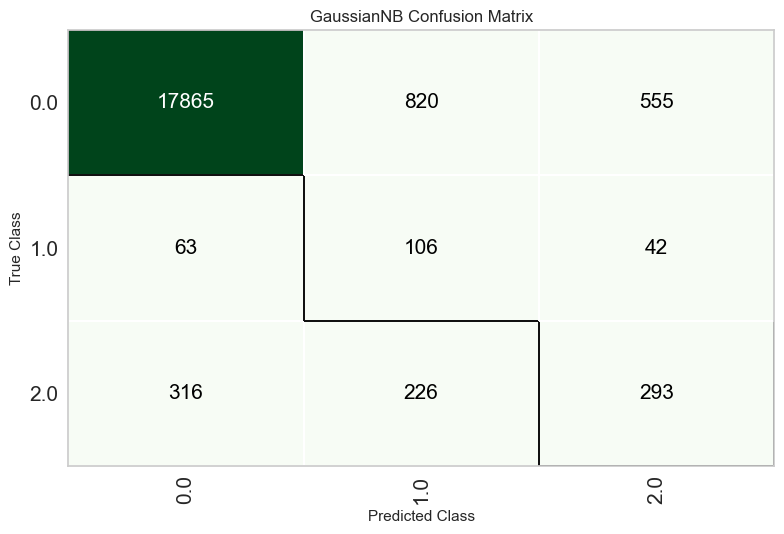

In [42]:
nb = create_model('nb')
plot_model(nb, 'confusion_matrix')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9546,0.8030,0.9546,0.9415,0.9430,0.3277,0.3792
1,0.9531,0.8148,0.9531,0.9402,0.9431,0.3450,0.3798
2,0.9546,0.7788,0.9546,0.9426,0.9428,0.3198,0.3749
3,0.9531,0.8101,0.9531,0.9398,0.9427,0.3342,0.3717
4,0.9582,0.8097,0.9582,0.9484,0.9498,0.4250,0.4613
5,0.9523,0.8046,0.9523,0.9377,0.9402,0.2934,0.3395
6,0.9558,0.8121,0.9558,0.9448,0.9462,0.3765,0.4169
7,0.9546,0.8025,0.9546,0.9437,0.9431,0.3222,0.3765
8,0.9546,0.8125,0.9546,0.9425,0.9430,0.3260,0.3785


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

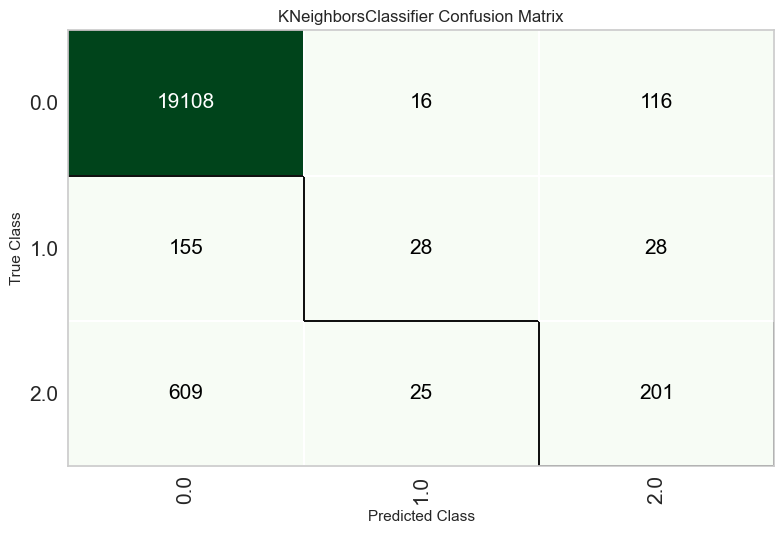

In [43]:
knn = create_model('knn')
plot_model(knn, 'confusion_matrix')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9516,0.0000,0.9516,0.9399,0.9326,0.1507,0.2518
1,0.9506,0.0000,0.9506,0.9360,0.9427,0.3788,0.3928
2,0.9476,0.0000,0.9476,0.9052,0.9259,0.0918,0.1479
3,0.9523,0.0000,0.9523,0.9327,0.9396,0.2922,0.3381
4,0.9535,0.0000,0.9535,0.9407,0.9469,0.4425,0.4515
5,0.9432,0.0000,0.9432,0.9265,0.9344,0.2767,0.2880
6,0.9529,0.0000,0.9529,0.9351,0.9425,0.3531,0.3825
7,0.9482,0.0000,0.9482,0.9445,0.9457,0.4537,0.4543
8,0.9506,0.0000,0.9506,0.9380,0.9441,0.4124,0.4198


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

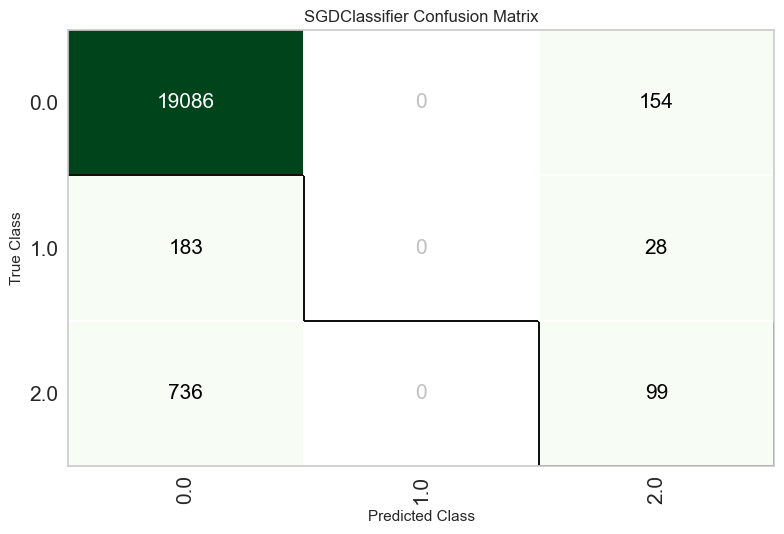

In [44]:
svm = create_model('svm')
plot_model(svm, 'confusion_matrix')

In [45]:
enn = EditedNearestNeighbours(sampling_strategy = 'majority')
sample_for_enn= df_2030.sample(n=150000)
print(sample_for_enn['diabete'].value_counts())
X, y = enn.fit_resample(sample_for_enn.drop("diabete", axis=1), sample_for_enn["diabete"])
sample_for_enn = X
sample_for_enn['diabete'] = y
print(sample_for_enn['diabete'].value_counts())
#from pycaret.classification import *
#exp_name = setup(data =  sample_for_enn,  target = 'diabete')
#compare_models(['nb', 'knn', 'svm'])

0.0    117296
1.0     29863
2.0      2841
Name: diabete, dtype: int64
0.0    64309
1.0    29863
2.0     2841
Name: diabete, dtype: int64


In [46]:
sample_for_enn.to_csv("sample_for_enn2.csv", index = False)